# Cogs108 - Analysis on Demographic Factors that Impact Pet Adoption (Feline and Canine) at State Level 

### Video Link: https://youtu.be/z9fZEUzlcHs
        

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Adopting gradually becomes a more preferred way to obtain a pet in the US. It is interesting and important to study whether there are relations between pet adoption and a state’s demographic. Our team hypothesized that a state's pet adoption might be correlated with the state's age structure, race distribution, and median household income. Aaccording to our pet adoption dataset, we divided pet adoption into Feline and Canine adoption. We conducted our analysis based on statistics of these variables at the state level during 2019. We applied an OLS regression test with multi-variables to explore the possible relationships between pet adoption and state’s demographics. The results showed that there is no particular relationship between age and pet adoption, no relationship between median household income and pet adoption, and no relationship between pet adoption and race distribution.



# Names

- Anni Li
- Freya Li
- Tian Gao
- Weining Dai
- Yifei Yi

<a id='research_question'></a>
# Research Question

*What effects do demographic factors such as age structure, median household income and racial diversity have in influencing pet (cat and dog) adoption rates per state during 2019?*

<a id='background'></a>

## Background & Prior Work

Upon research our team discovered an overlap in states with high economic ranking and high pet adoption numbers. According to recent data from 2020 to 2021, states with the highest median household income were California, Texas, New York, and Florida. At the same time, we noticed that the states with the most pet adoptions from shelters were California, Texas, Florida, and Corolina (Velez, 2021).

Our team saw potential in this overlap in the state's economic situation with pet adoption and sought to explore further. Starting from median household income, we selected a few demographic factors. The other datasets were collected from government agencies and credible organizations supported our research in determining other factors such as age structure, state's GDP, and racial diversity.



References (include links):
- 1)"median household income by State". median household income by State | U.S. Bureau of Economic Analysis (BEA). Bureau of Economic Analysis. Retrieved 10 April 2022, from
https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html
- 2)Statista Research Department, & 22, F. (2022, February 22). State population: United States 2021. Statista. Retrieved April 22, 2022, from https://www.statista.com/statistics/183497/population-in-the-federal-states-of-the-us/ 
- 3)Velez, L. (2021, October 22). Pet adoption statistics by state: Honest paws®. Honest Paws. Retrieved April 22, 2022, from
https://www.honestpaws.com/blog/pet-adoption-statistics-by-state/ 

# Hypothesis


Hypothesis 1: Pet adoption of each state is correlated to age distribution of each state: the state with a larger middle-aged group has higher pet adoption rates. We assume middle-aged groups have more financial and mental stability compared to younger groups, and better availability to take care of pets compared to older groups, thus they are more likely to adopt pets.

Hypothesis 2: We hypothesize that race will have no significant relationship with pet adoption, because pet adoptions are random choices unrelated to a person’s ethnicity.

Hypothesis 3: Pet adoption rate of each state is positively correlated with each state’s median household income level, because we assume higher median household income can better bear the cost of keeping a pet.



# Datasets

#### Dataset - Pet adoption
- Dataset Name: sac_aggregate_dataset_2019_2021.csv
- Link to the dataset: https://airtable.com/shrVAchsnFhMegpbk?prefill_type=Free+CSV+Download 
- Number of observations: 4,770

This dataset includes the state’s intake and outcome information about pet dogs and cats from 2019-2021; the columns involved in this dataset are the adoption total of Feline and Canine(integer), state(string), year(integer),returned to owner total-feline and canine,etc; each row represents a particular pet sheltering value of each state per year.
This dataset is from the Shelter Animals Count which is one of the most trustworthy national statistics of pet sheltering and animal welfare.

#### Dataset - Age
- Dataset Name: 2019 age distribution.csv
- Link to the dataset:  https://www.kff.org/other/state-indicator/distribution-by-age/?dataView=1&currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
- Number of observations: 433

This csv file was downloaded from the Kaiser Family Foundation which is a non-profit organization for national health issues.It was claimed to be non-political organization which respect the truth and the statistics.This dataset includes the age structure of different locations in the United States in 2019. The columns include Locations (string), 6 age groups (int), a Total (int) population in that location as a reference. It contained Footnotes (float)for some of the locations.

The Rows are divided by locations. There are some extra rows (string) in the end of the dataset which do not contains statistics but illustrated the source of this dataset. The total observation is 433.

#### Dataset - Income
- Dataset Name: Median Household Income by State
- Link to the dataset:  https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html
- Number of observations: 4,187

This csv file was converted from the .xlsx file downloaded from the United States Census Bureau, which is an offical US government website for data publication, so this dataset is official and ethical. This dataset includes the median household Income of United States, divided by different states, from 1984 to 2020. The columns include median Income (int) by each year and the standard error of each year's measured median Income. Information on confidentiality protection, sampling error, nonsampling error, and definitions is available at https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar21.pdf. According to the footnotes, standard errors were calculated using replicate weights.

The Rows are divided by locations (States). The total observation is 4187, but since we only need the years from 2019-2020, we will drop all columns before 2018 and also drop the standard error columns. 

Source: U.S. Census Bureau, Current Population Survey, 1985 to 2021 Annual Social and Economic Supplements (CPS ASEC).

#### Dataset - Race
- Dataset Name: Population by Race - US, States, Counties.csv
- Link to the dataset: https://www.statsamerica.org/downloads/default.aspx
- Number of observations: 95,800

This csv file was directly downloaded from StatsAmerica. This dataset includes population by race of each US state and county from 1990 to 2019. The columns in this dataset include the numeric code of each US geographic area, names of said geographic area, year of documentation and population devided into 8 different racial categories. Each row represents a numeric code or population numnber for each geographic area per year.

The downloaded csv file has 95,800 observations, most of which is irrelevent to our research and will be trimmed down.

Source: StatsAmerica is a service of the Indiana Business Research Center at Indiana University's Kelley School of Business. This initiative is funded in part by the U.S. Commerce Department's Economic Development Administration.

*Ways to combine the multiple datasets:
For the efficiency of the work, we chose to merge the pet adoption dataset with each independent variable data set(i.e. age distribution). We used the common column "State" to merge them together. 


# Setup

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# Data Cleaning

We have 4 datasets to clean. They are Pet Adoption, Age, Race and Income for each state in the 2019.

### Data Cleaning - Pet Adoption

In [13]:
pet_raw=pd.read_csv('sac_aggregate_dataset_2019_2021.csv')

# we check that there is no missing value 
missing=pet_raw.isnull().sum().sum()
missing


0

In [14]:
#we select the columns we need, and assign it to a new name "pet"
pet=pet_raw[['Year','State','Live Outcome - Adoption Total-Feline','Live Outcome - Adoption Total-Canine']]
# we assign a shorter name for each column.
pet.columns=['Year','State','Feline Adoption','Canine Adoption']


In [15]:
#We want to Convert Adoption variable from str to int 
#1.remove the "," from the string
pd.set_option('mode.chained_assignment', None)
pet['Feline Adoption']=pet['Feline Adoption'].str.replace(',','')
pet['Canine Adoption']=pet['Canine Adoption'].str.replace(',','')

#2. define a function that convert str to in
def standardize_adoption(str_in):
    output = int(str_in)
    return output

#3. apply the function 
pet['Feline Adoption']=pet['Feline Adoption'].apply(standardize_adoption)
pet['Canine Adoption']=pet['Canine Adoption'].apply(standardize_adoption)

#4. check type 
type(pet['Feline Adoption'][0])

numpy.int64

In [16]:
# Then We want to convert the Year varible (int) to str and Adoption(str) to int
#Convert the "Year" variable from int to str
def standardize_year(int_in):
    output=str(int_in)
    return output
pet['Year']=pet['Year'].apply(standardize_year)

# We have the mean adoption number for each state here. But we want to keep 1 decimal place. 
pet1=pet.groupby(by=['State']).mean()
pet_mean=pet1.round(1)
# Median may be a better representation for this data since it is less sensitive to outliers.
pet_median=pet.groupby(by=['State']).median()

pet_median

,Feline Adoption,Canine Adoption
State,,
AK,1755,0
AL,7181,7681
AR,3274,3524
AZ,17735,29709
CA,64086,52723
CO,27927,22847
CT,2089,1161
DC,3318,1662
DE,875,470


In [17]:
pet_median.shape

(53, 2)

After cleanning, we have 53 rows(each state) and 2 columns(Feline and Canine) with the index of State for the pet adoption dataset. 

### Data Cleaning - Age

First we need to read the dataset from our csv files and get rid of all the missing values from it.

In [18]:
#load the age distirbution cvs, and assign it to age_raw
age_raw = pd.read_csv('2019 age distribution.csv')

#There are 63 rows and 9 columns in this dataset
age_raw.shape

#Type of the data
print ('The type of "Location" is' + str(type(age_raw['Location'][0])))
print ('The type of "Children 0-18" is' + str(type(age_raw['Children 0-18'][0])))
print ('The type of "Footnotes" is' + str(type(age_raw['Footnotes'][0])))

#count how many cells contains a value (i.e. how many observations)
age_raw.count(axis=0, level=None, numeric_only=False).sum()

missing_age = age_raw.isnull().sum()

The type of "Location" is<class 'str'>
The type of "Children 0-18" is<class 'numpy.float64'>
The type of "Footnotes" is<class 'numpy.float64'>


After the most basic removing of missing values, we then need to rename the dataframe and all its columns as needed. Meanwhile, we also need to take a close look at the basic statistic information of our dataset and to get rid of the locations we do not need (i.e. not include in the 50 states).

In [54]:
#select the columns we need, and assign it to a new dataframe "age"
age = age_raw.iloc[:,:8]

#select the rows we need, and reassign to "age"
age = age.dropna()


#United States, Distric of Columbia and Puerto Rico are not states from the United States, we need to remove that column and redefine "age"
age = age.loc[1:51,]
age = age.drop(9)

#The column names are tedious and unstandardized, we need to change the name of the columns
age.columns = ['State','0-18','19-25','26-34','35-54','55-64','65+','Total']


In [55]:
#There are 50 rows and 8 columns in this dataset
age.shape

(50, 8)

In [56]:
#basic stats for new age dataframe
age.describe()

,0-18,19-25,26-34,35-54,55-64,65+,Total
count,5.00e+01,5.00e+01,5.00e+01,5.00e+01,5.00e+01,5.00e+01,5.00e+01
mean,1.50e+06,5.55e+05,7.93e+05,1.63e+06,8.40e+05,1.05e+06,6.37e+06
std,1.74e+06,6.49e+05,9.53e+05,1.88e+06,9.04e+05,1.13e+06,7.22e+06
...,...,...,...,...,...,...,...
50%,1.07e+06,3.89e+05,5.40e+05,1.10e+06,5.93e+05,7.45e+05,4.41e+06
75%,1.71e+06,6.48e+05,9.55e+05,1.88e+06,9.49e+05,1.27e+06,7.34e+06
max,9.17e+06,3.54e+06,5.29e+06,1.02e+07,4.75e+06,5.74e+06,3.86e+07


To get the age structure, we might also need the proportion of each age group under each state

In [19]:
#Create a new dataframe for proportion called age_p
age_p = pd.DataFrame()

#Calculating the percentage of each age group by using the value in each cell divided by the Total in the same row and appending it into the new dataframe
age_p = age.iloc[:, 1:7].div(age['Total'], axis=0).round(2)

#Insert the States into the dataframe
age_p['State'] = age.State

#Reorder the columns to put State back to the first column
age_p = age_p[['State','0-18','19-25','26-34','35-54','55-64','65+']]

age_p.reset_index(inplace = True, drop = True)


#There are 50 rows and 7 columns in this dataset
age_p.shape

#basic stats for new age dataframe
age_p.describe()

age_p

,State,0-18,19-25,26-34,35-54,55-64,65+
0,Alabama,0.24,0.09,0.12,0.25,0.14,0.18
1,Alaska,0.26,0.09,0.14,0.25,0.13,0.13
2,Arizona,0.24,0.09,0.12,0.24,0.12,0.18
3,Arkansas,0.25,0.09,0.11,0.25,0.13,0.17
4,California,0.24,0.09,0.14,0.26,0.12,0.15
5,Colorado,0.23,0.09,0.14,0.27,0.13,0.15
6,Connecticut,0.22,0.09,0.11,0.26,0.15,0.18
7,Delaware,0.22,0.08,0.12,0.24,0.14,0.20
8,Florida,0.21,0.08,0.11,0.25,0.14,0.21
9,Georgia,0.25,0.09,0.12,0.27,0.12,0.15


### Data Cleaning - Race

In [20]:
#Get csv file from team member's local computer; file was downloaded from Statsamerica
rc_raw = pd.read_csv('Population by Race - US, States, Counties.csv')
#Drop first 3 columns
rc_no3 = rc_raw.iloc[:,3:]

#Select rows that have a state name in the 'Description' column
rc_st = rc_no3[rc_no3.Description.isin(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado',
                                        'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa',
                                        'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 
                                        'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
                                        'Mississippi', 'Montana', 'North Carolina', 'North Dakota', 
                                        'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 
                                        'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
                                        'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 
                                        'Vermont','Washington', 'Wisconsin', 'West Virginia','Wyoming'])]
rc_st.head()

,Description,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,Hispanic
30,Alabama,1990,4050055.0,2987764.0,1024198.0,16224.0,21869.0,NaN,NaN,4025948.0,24107.0
31,Alabama,1991,4099156.0,3018779.0,1040280.0,17015.0,23082.0,NaN,NaN,4074144.0,25012.0
32,Alabama,1992,4154014.0,3051680.0,1060627.0,17357.0,24350.0,NaN,NaN,4127269.0,26745.0
33,Alabama,1993,4214202.0,3088449.0,1081479.0,18002.0,26272.0,NaN,NaN,4184665.0,29537.0
34,Alabama,1994,4260229.0,3114389.0,1099593.0,18566.0,27681.0,NaN,NaN,4227077.0,33152.0


In [21]:
#Select rows that have '2019' in the 'Year' column
rc_yr = rc_st[rc_st['Year'] == 2019]
rc_yr.reset_index(inplace = True, drop = True) #Initialize the index and remove the old index column

#Rename column to make more sense
rc = rc_yr.rename(columns = {'Description':'State'})

#Remove werid and uninformative column 'Not Hispanic'
rc = rc.drop(columns='Not Hispanic')
rc.head()

,State,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Hispanic
0,Alabama,2019,4903185.0,3389396.0,1313291.0,34799.0,73715.0,5110.0,86874.0,223278.0
1,Alaska,2019,731545.0,477488.0,27108.0,113953.0,47799.0,10498.0,54699.0,53212.0
2,Arizona,2019,7278717.0,6013442.0,376997.0,385903.0,268723.0,20169.0,213483.0,2310590.0
3,Arkansas,2019,3017804.0,2385258.0,473048.0,30717.0,50403.0,11786.0,66592.0,236631.0
4,California,2019,39512223.0,28424739.0,2552757.0,649862.0,6110945.0,199805.0,1574115.0,15574880.0


In [22]:
# Convert type of population values from float to integer
float_col = rc.select_dtypes(include=['float64'])
for col in float_col.columns.values:
    rc[col] = rc[col].astype('int64')

#Use dictionary found online to convert full state names to abbreviations: https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA",
                      "Colorado": "CO","Connecticut": "CT","Delaware": "DE","Florida": "FL","Georgia": "GA",
                      "Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS",
                      "Kentucky": "KY","Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA",
                      "Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO","Montana": "MT",
                      "Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM",
                      "New York": "NY","North Carolina": "NC","North Dakota": "ND","Ohio": "OH","Oklahoma": "OK",
                      "Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI","South Carolina": "SC",
                      "South Dakota": "SD","Tennessee": "TN","Texas": "TX","Utah": "UT","Vermont": "VT",
                      "Virginia": "VA","Washington": "WA","West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY",
                     }
rc.replace({'State': us_state_to_abbrev})

rc.head()

,State,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Hispanic
0,Alabama,2019,4903185,3389396,1313291,34799,73715,5110,86874,223278
1,Alaska,2019,731545,477488,27108,113953,47799,10498,54699,53212
2,Arizona,2019,7278717,6013442,376997,385903,268723,20169,213483,2310590
3,Arkansas,2019,3017804,2385258,473048,30717,50403,11786,66592,236631
4,California,2019,39512223,28424739,2552757,649862,6110945,199805,1574115,15574880


Everything is clean now, but two things still look off. We deleted a column (that didn't make sense) so now the 'Total Population' is incorrect. We will need to update that column, and also switch some columns to make the dataframe look tidier.

In [23]:
rc['Total'] = rc.loc[:,['White Alone', 'Black Alone', 'American Indian or Alaskan Native', 'Asian Alone', 'Hawaiian or Pacific Islander Alone', 'Two or More Races', 'Hispanic']].sum(axis = 1)
columns_titles = ['State','Year','White Alone', 'Black Alone', 'Asian Alone','Hispanic','Hawaiian or Pacific Islander Alone','American Indian or Alaskan Native','Two or More Races','Total']
rc=rc.reindex(columns=columns_titles)
rc.head()

,State,Year,White Alone,Black Alone,Asian Alone,Hispanic,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races,Total
0,Alabama,2019,3389396,1313291,73715,223278,5110,34799,86874,5126463
1,Alaska,2019,477488,27108,47799,53212,10498,113953,54699,784757
2,Arizona,2019,6013442,376997,268723,2310590,20169,385903,213483,9589307
3,Arkansas,2019,2385258,473048,50403,236631,11786,30717,66592,3254435
4,California,2019,28424739,2552757,6110945,15574880,199805,649862,1574115,55087103


In [24]:
#Determine shape of cleaned dataframe
rc.shape

(50, 10)

After cleaning, we have a dataframe of 50 rows (50 states) and 10 columns (7 races).

### Income data - description

In [25]:
#Read csv file and store it as a variable
income_raw = pd.read_csv('median_house_income.csv')

#Look at the dataset
income_raw.head()

,State,2020,Unnamed: 2,2019,Unnamed: 4,2018,Unnamed: 6,2017 (40),Unnamed: 8,2017,...,1988,Unnamed: 70,1987 (21),Unnamed: 72,1986,Unnamed: 74,1985 (20),Unnamed: 76,1984 (19),Unnamed: 78
0,NaN,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,...,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error
1,United States,"67,521",475,"68,703",550,"63,179",420,"61,136",322,"61,372",...,"27,225",139,"26,061",127,"24,897",129,"23,618",128,"22,415",102
2,Alabama,"54,393","2,587","56,200","2,512","49,936","2,423","50,865","1,094","51,113",...,"19,948",912,"19,734","1,147","19,132",885,"18,333",760,"17,310",605
3,Alaska,"74,476","3,570","78,394","6,685","68,734","3,390","77,987","3,718","72,231",...,"33,103","1,183","33,233","1,497","31,356","1,017","34,782","1,089","32,356","1,473"
4,Arizona,"66,628","3,534","70,674","3,391","62,283","2,291","59,700","2,689","61,125",...,"26,435",843,"26,749",892,"25,500",718,"23,877",744,"21,425",609


In [26]:
#Show the size of dataset
print('The size of the dataset is', income_raw.shape)

The size of the dataset is (53, 79)


In [27]:
#Type of the data
print ('The type of "State is"' + str(type(income_raw['State'][3])))
print ('The type of "Median Income" is' + str(type(income_raw['2020'][3])))

The type of "State is"<class 'str'>
The type of "Median Income" is<class 'str'>


We can see that the content of this dataset are strings. In the data cleaning section, we need to convert the values of Income into integers. Also, we are going to drop columns of years before 2018 and drop all the standard error columns.


In [28]:
#count how many cells contains a value (i.e. how many observations)
income_raw.count(axis=0, level=None, numeric_only=False).sum()

4186

In [29]:
#check if there is a null Income value
missing_Income = income_raw.isnull().sum()
checknullIncome = 0
nullIncome = ''
for i in missing_Income:
    if(i != 0):
        checknullIncome = checknullIncome + 1
print ('there are', checknullIncome, 'null Income')

there are 1 null Income


From the dataset we can see that the null income is actually a 'NaN' at the upper left corner of the dataset, so in fact there are no null income of our dataset.

### income data: Cleaning

In [30]:
# drop the columns before 2018
income0 = income_raw.iloc[:,:6]
income0.head()

,State,2020,Unnamed: 2,2019,Unnamed: 4,2018
0,NaN,Median income,Standard error,Median income,Standard error,Median income
1,United States,"67,521",475,"68,703",550,"63,179"
2,Alabama,"54,393","2,587","56,200","2,512","49,936"
3,Alaska,"74,476","3,570","78,394","6,685","68,734"
4,Arizona,"66,628","3,534","70,674","3,391","62,283"


In [31]:
# drop the columns before 2018
income0 = income_raw.iloc[:,:6]
income0.head()#Drop the standard error colums
income1 = income0.drop(income0.columns[2], axis=1, inplace=False)
income2 = income1.drop(income1.columns[3], axis=1, inplace=False)
income2.head()

,State,2020,2019,2018
0,NaN,Median income,Median income,Median income
1,United States,"67,521","68,703","63,179"
2,Alabama,"54,393","56,200","49,936"
3,Alaska,"74,476","78,394","68,734"
4,Arizona,"66,628","70,674","62,283"


In [32]:
#Drop the standard error colums
income1 = income0.drop(income0.columns[2], axis=1, inplace=False)
income2 = income1.drop(income1.columns[3], axis=1, inplace=False)
income2.head()

,State,2020,2019,2018
0,NaN,Median income,Median income,Median income
1,United States,"67,521","68,703","63,179"
2,Alabama,"54,393","56,200","49,936"
3,Alaska,"74,476","78,394","68,734"
4,Arizona,"66,628","70,674","62,283"


In [33]:
#Drop the zeroth and first row
income3 = income2.drop([0], axis = 0, inplace = False)
income4 = income3.drop([1], axis = 0, inplace = False)
income4.head()

,State,2020,2019,2018
2,Alabama,"54,393","56,200","49,936"
3,Alaska,"74,476","78,394","68,734"
4,Arizona,"66,628","70,674","62,283"
5,Arkansas,"50,540","54,539","49,781"
6,California,"77,358","78,105","70,489"


In [34]:
#Drop the zeroth and first row
income3 = income2.drop([0], axis = 0, inplace = False)
income4 = income3.drop([1], axis = 0, inplace = False)
income4.head()

,State,2020,2019,2018
2,Alabama,"54,393","56,200","49,936"
3,Alaska,"74,476","78,394","68,734"
4,Arizona,"66,628","70,674","62,283"
5,Arkansas,"50,540","54,539","49,781"
6,California,"77,358","78,105","70,489"


In [35]:
# remove the commas and convert string to float.
for i in range(0,51):
    for j in range(1,4):
        income4.iloc[i,j] = np.float64(income4.iloc[i,j].replace(',',''))
income4.head()

,State,2020,2019,2018
2,Alabama,54393,56200,49936
3,Alaska,74476,78394,68734
4,Arizona,66628,70674,62283
5,Arkansas,50540,54539,49781
6,California,77358,78105,70489


So we have dropped the years before 2018 and the standard error columns. We also dropped the zeroth row which contains the definition of the observation. For the observations we removed the commas and converted the string to int type for further use. Now the income dataframe is clean and easy to use.

Week8 update: Since the race dataset takes only data from 2019, I will drop other years of income data correspondingly.


In [36]:
#drop columns and reset index
income5 = income4.drop(income4.columns[1], axis=1, inplace=False)
income6 = income5.drop(income5.columns[2], axis=1, inplace=False)
income7 = income6.drop(10, axis=0, inplace=False)
income7 = income7.reset_index(drop=True)
income7.head()

,State,2019
0,Alabama,56200
1,Alaska,78394
2,Arizona,70674
3,Arkansas,54539
4,California,78105


In [37]:
income = income7.rename(columns={"2019": "income2019"}, errors="raise")
income['State']=['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
     'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
     'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
     'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
     'SD', 'TN', 'TX','UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
income

,State,income2019
0,AL,56200
1,AK,78394
2,AZ,70674
3,AR,54539
4,CA,78105
5,CO,72499
6,CT,87291
7,DE,74194
8,FL,58368
9,GA,56628


# Data Analysis & Results 

We combined EDA, Analysis and Data Visualization in this section. 

##  Pet Adoption

In [38]:
#reset index 
pet_median=pet_median.reset_index()

In [39]:
#Code to adjust the visulization a little bit nicer
# Don't display too many rows/cols of DataFrames
sns.set(context = 'talk', style='white')
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.options.display.precision = 2
# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 8)

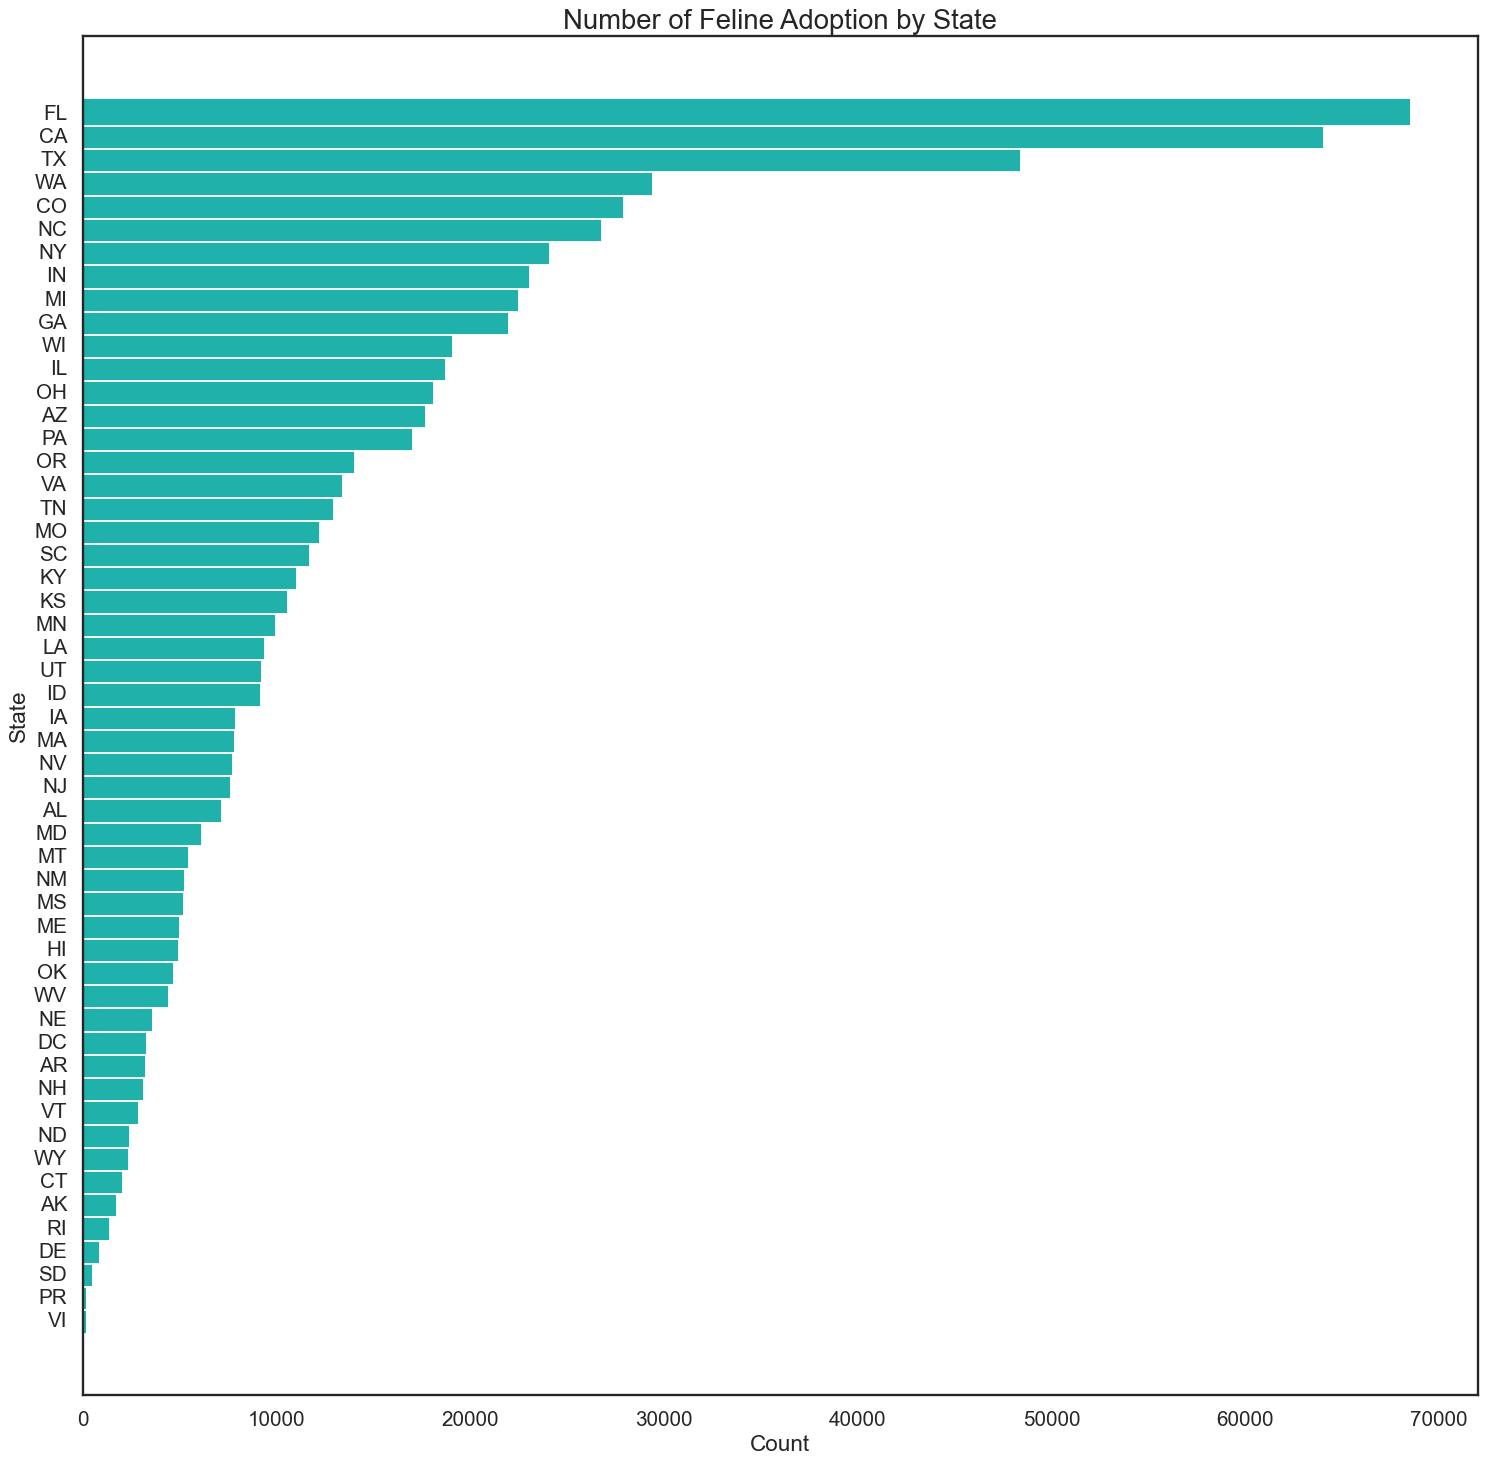

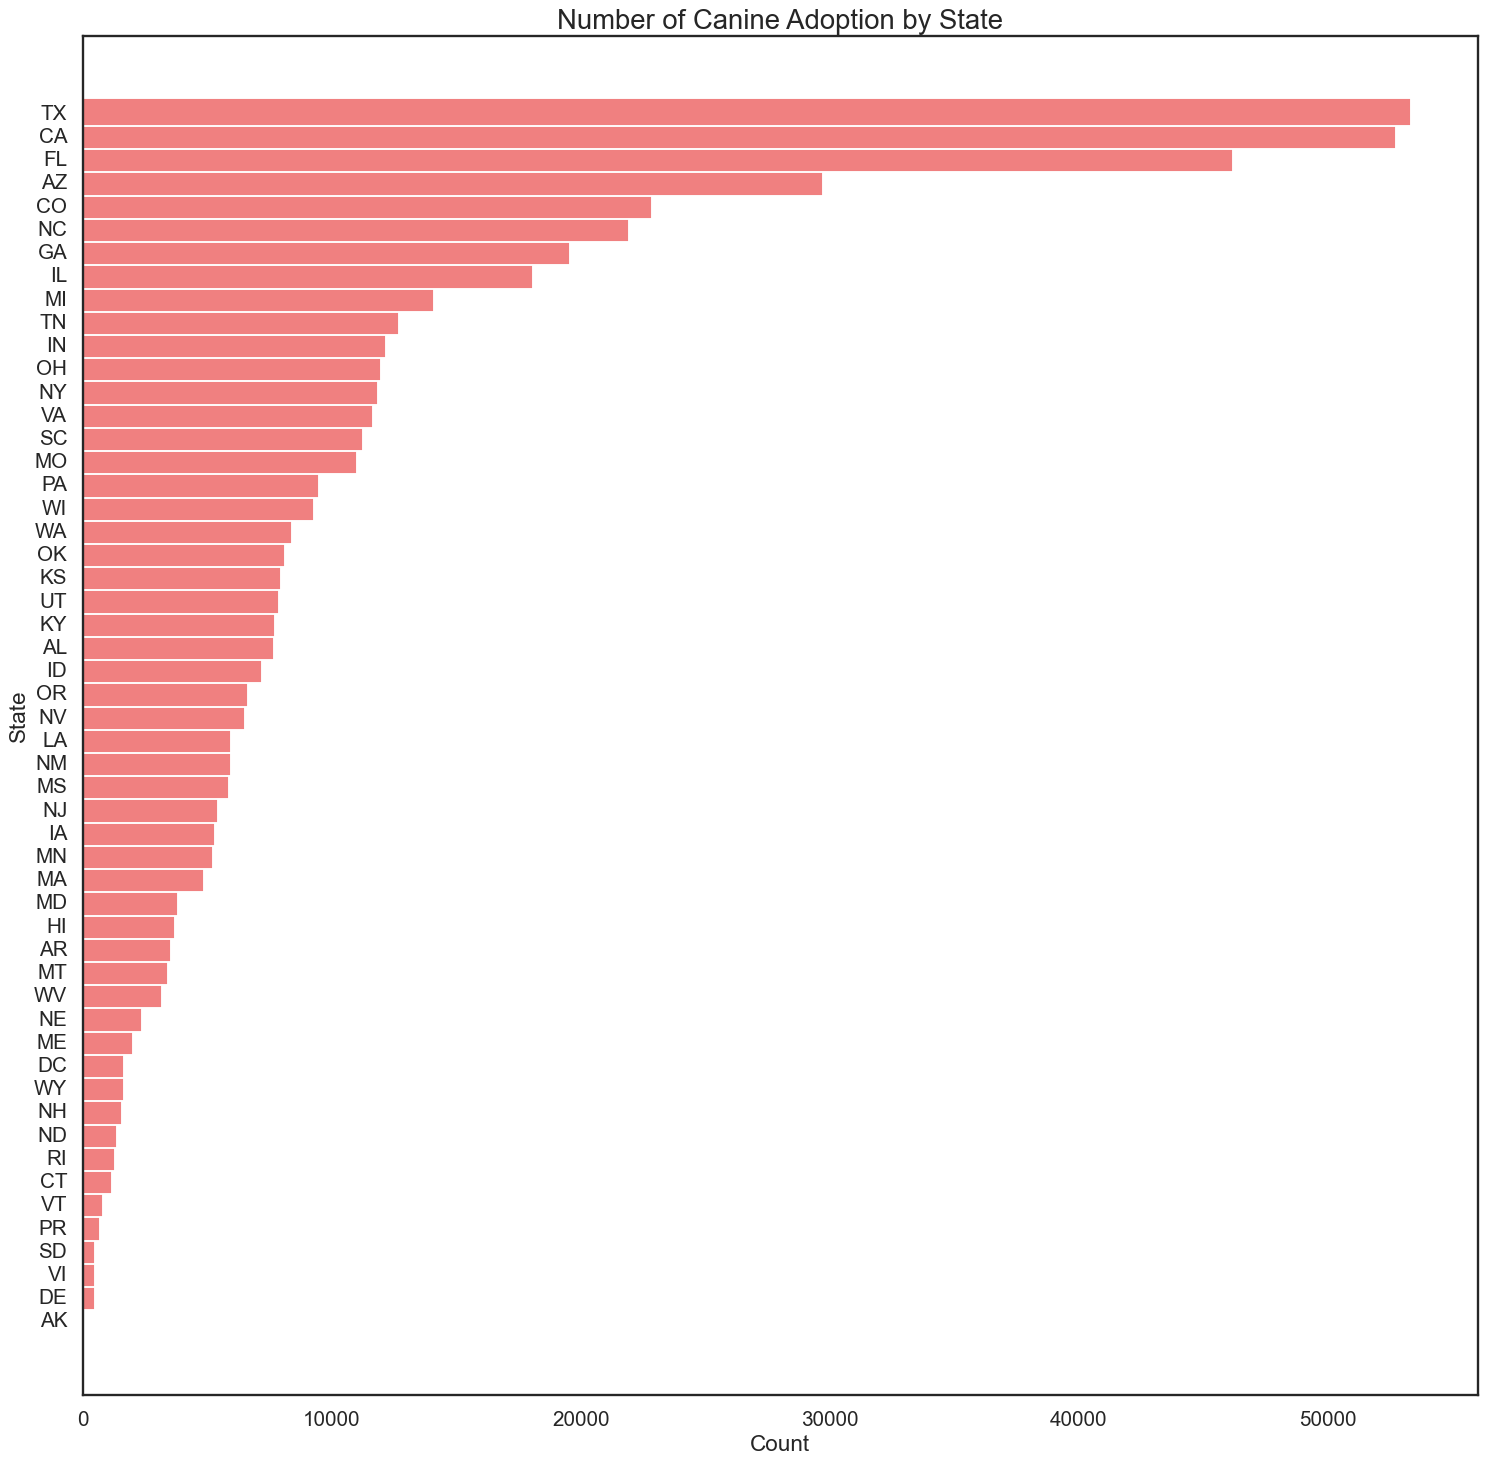

In [40]:
# To have a better idea which states adopt more pets in the data, we sorted the data based on the adoption number \
#and then draw the two graphs. 
sort_F=pet_median.sort_values(by=['Feline Adoption'])
sort_C=pet_median.sort_values(by=['Canine Adoption'])

width=1.2

plt.figure(figsize=(20,20), dpi= 90)
plt.barh(sort_F['State'], sort_F['Feline Adoption'],width, color='lightseagreen',align='center')
plt.title("Number of Feline Adoption by State", fontsize=22)
plt.ylabel('State')
plt.xlabel('Count')
f1 = plt.gcf()


plt.figure(figsize=(20,20), dpi= 90)
plt.barh(sort_C['State'],sort_C['Canine Adoption'], width,color='lightcoral',align='center')
plt.title("Number of Canine Adoption by State", fontsize=22)
plt.ylabel('State')
plt.xlabel('Count')

f2 = plt.gcf()

Analysis: After sorting the data, we found that the distribution of the pet adoption data set is uneven between states. Florida, California, Texas are the 3 states have highest pet adoption numbers for both Feline and Canine. Virgin Islands,Delaware,Alaska, South Dakota have the samllest numbers of pet adoption according to our data set. The shape of the distribution is skewed to the right. The median of both feline and canine data is smaller than the mean. 



### Distribution

In [41]:
pet_median.describe()

,Feline Adoption,Canine Adoption
count,53.00,53.00
mean,12815.43,9817.87
std,14262.84,11944.79
...,...,...
50%,7882.00,6523.00
75%,17735.00,11645.00
max,68580.00,53359.00


### Outlier

In the bar graph for pet adoption, we see that there are few states had 0 pet adoption (either for feline or for canine). They are outliers of our data but we also want to know is it meaningful to include them in our data. If the shelter recorded 0 pet adoption indeed did not have any pet adoption acativity, we should include the 0 in our data, but if the 0 means missing value, we should drop it. We checked the source of the pet adoption data, but we did not find the information about the meaning of 0 in our data set. 

# EDA of Age and Pet Adoption

First we take a look at the distribution


### Max and Min

In [42]:
###Because we are interested in exploring the age structure, we need to find out the most general age group in each state (i.e. the mode)
max_age = age_p.iloc[:, 1:].idxmax(axis=1)
max_age_p = age_p.iloc[:,1:].max(axis=1)
#Insert the States into the dataframe
age_pmax=pd.DataFrame({'State':age_p['State'],
                       'max_age':max_age,
                      'max_age_p':max_age_p})
age_pmax

,State,max_age,max_age_p
0,Alabama,35-54,0.25
1,Alaska,0-18,0.26
2,Arizona,0-18,0.24
...,...,...,...
47,West Virginia,35-54,0.25
48,Wisconsin,35-54,0.25
49,Wyoming,0-18,0.25


In [43]:
###Find out how many age group is involved
age_pmax['max_age'].value_counts()

age_pmax[age_pmax['max_age']=='35-54'].mean()

max_age_p    0.26
dtype: float64

In [44]:
###Because we are interested in exploring the age structure, we need to find out the least general age group in each state (i.e. the mode)
min_age = age_p.iloc[:, 1:].idxmin(axis=1)
min_age_p = age_p.iloc[:,1:].min(axis=1)
#Insert the States into the dataframe
age_pmin=pd.DataFrame({'State':age_p['State'],
                       'min_age':min_age,
                      'min_age_p':min_age_p})
age_pmin['min_age'].value_counts()
age_pmin[age_pmin['min_age']=='19-25'].mean()

min_age_p    0.09
dtype: float64

### Interpretation of max and min
The most crowded age groups are 34-54 among most states are which has a mean percentage around 0.26, which means there are 1/4 of the populations are in this age group.
The least crowded age groups among 49 states are 19-25 with a mean percetage of 0.09, which means there are less than 1/10 of the populations are in this age group.

### Central tendency

In [45]:
age_p.describe()

,0-18,19-25,26-34,35-54,55-64,65+
count,50.00,5.00e+01,5.00e+01,5.00e+01,50.00,50.00
mean,0.24,8.60e-02,1.21e-01,2.51e-01,0.13,0.17
std,0.02,7.00e-03,9.26e-03,9.82e-03,0.01,0.02
...,...,...,...,...,...,...
50%,0.24,9.00e-02,1.20e-01,2.50e-01,0.13,0.17
75%,0.25,9.00e-02,1.30e-01,2.60e-01,0.14,0.18
max,0.31,1.10e-01,1.40e-01,2.70e-01,0.16,0.21


### Interpretation of central tendency
Since the mean, mode, and median are all the same value for all age groups, it could be predicted that there is little skew within each age group. Meanwhile, the standard deviation is relatively small which means that the percentage of people in each age group is relatively consistant.This would also be visualized in the following graphs

Text(0.5, 0, 'State')

<Figure size 720x576 with 0 Axes>

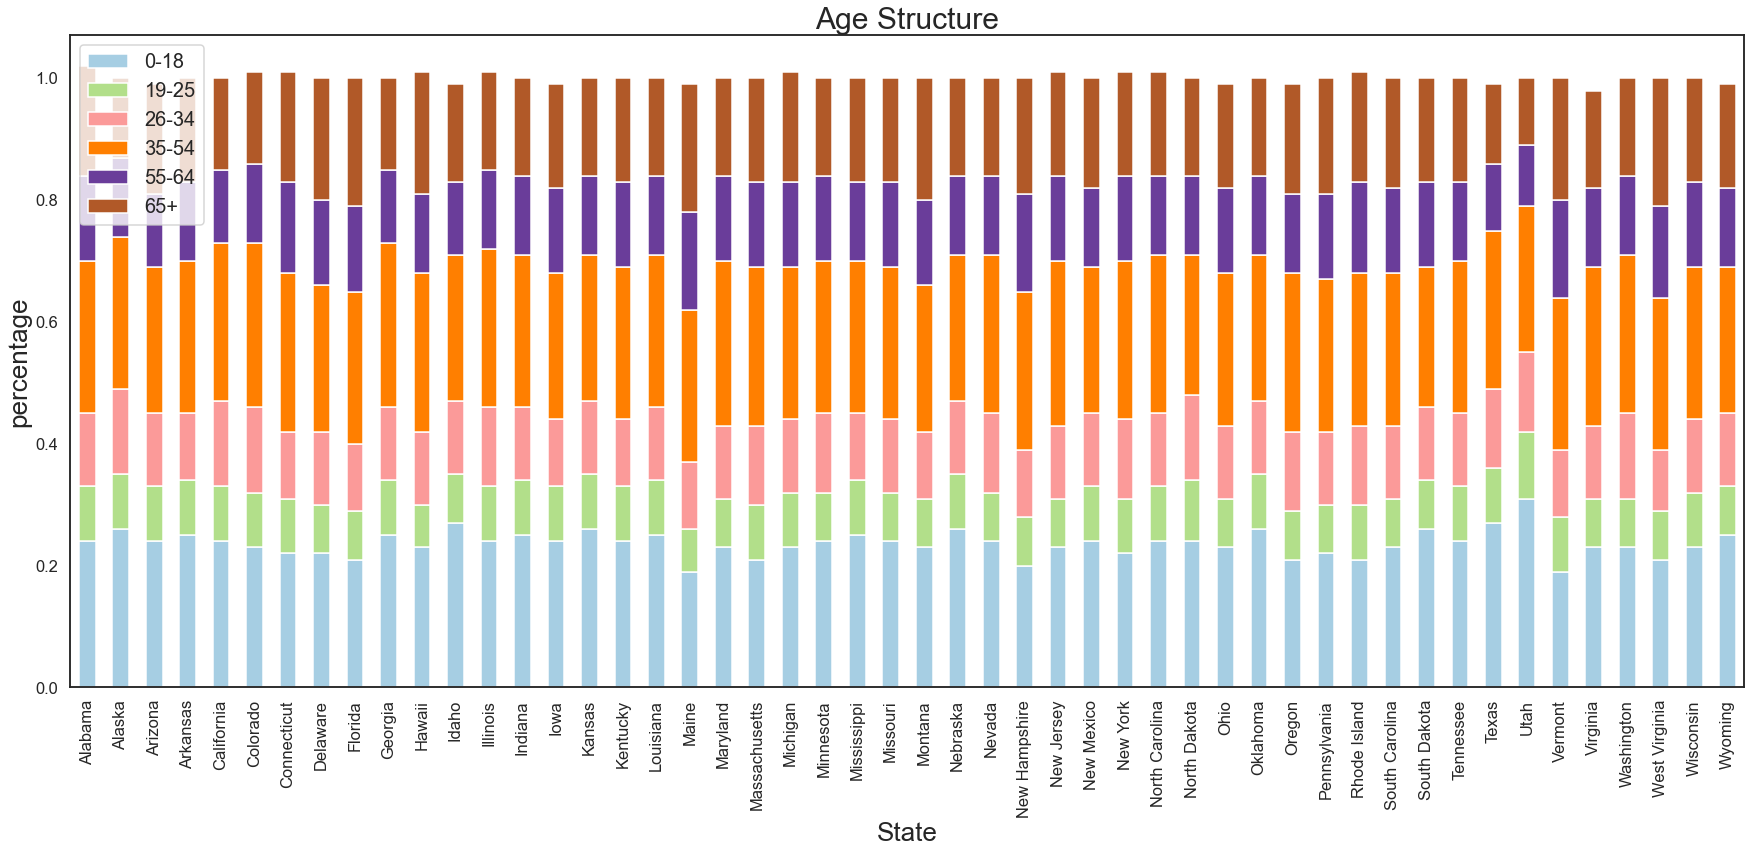

In [46]:
###plot the age distribution in one graph
plt.figure()
plt.rcParams['font.size'] = '20'
ax1 = age_p.plot(x='State', kind='bar', stacked=True,
           colormap='Paired',figsize=(30,12))
ax1.set_title('Age Structure',fontdict={'fontsize':30})
ax1.legend(loc=2,fontsize=20)
ax1.set_ylabel('percentage',fontdict={'fontsize':26})
ax1.set_xlabel('State',fontdict={'fontsize':26})

### Interpretations of State's age structure
Generally speaking, the states have quite similar strucutre with more 0-18(light blue colored bar) and 35-54 groups(orange colored bar). This is aligned with our previous finding of maximum age of each state that either 0-18 or 35-54 were the most crowded groups.
However, there might be some error in out dataset since the sum of percentage was not always equals to 1. Some less-than-1 case might be a result of missing age data from the citizens; some over-than-1 data might be a result of documentation duplication. However, since we do not have the first-hand data collected from each states, we are not capable of finding out the real causation and fix it. This might contribute to one of our limitations and errors.

Text(0.5, 1.0, 'Age Distribution')

<Figure size 720x576 with 0 Axes>

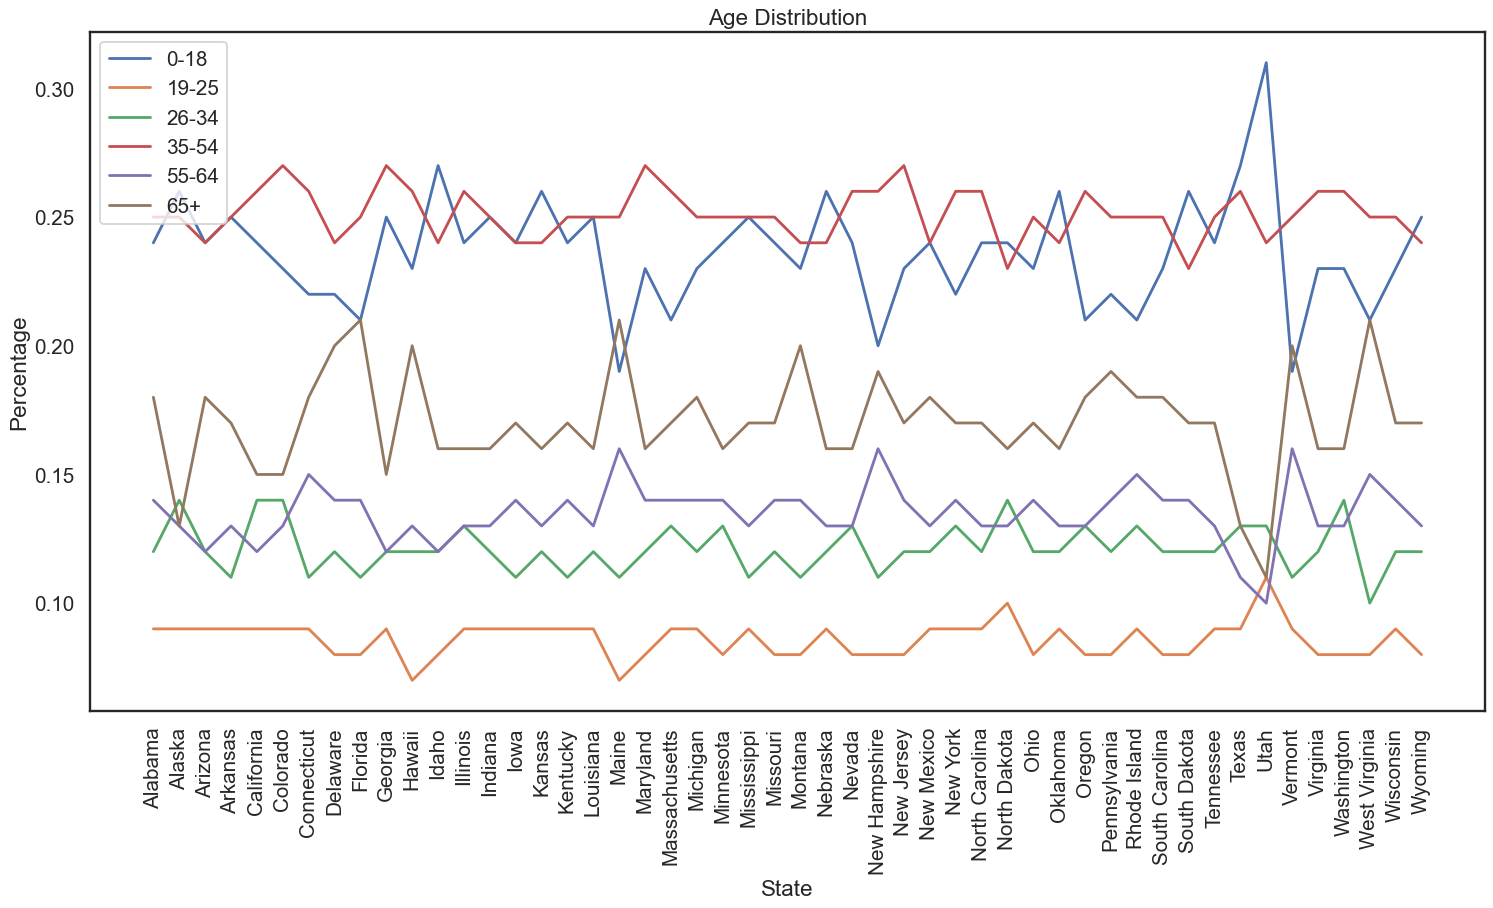

In [47]:
f2 = plt.gcf()
width=1.2

plt.figure(figsize=(20,10), dpi= 90)
state=age_p['State']
plt.plot(state, age_p['0-18'],label='0-18')
plt.plot(state, age_p['19-25'],label='19-25')
plt.plot(state, age_p['26-34'],label='26-34')
plt.plot(state, age_p['35-54'],label='35-54')
plt.plot(state, age_p['55-64'],label='55-64')
plt.plot(state, age_p['65+'],label='65+')

plt.xticks(rotation=90)
plt.legend(loc=2)
plt.xlabel('State')
plt.ylabel('Percentage')
plt.title('Age Distribution')

### Interpretations of Age distribution and State
This graph also shows the population within each age groups in each state. This is echoed with the previous stacked bar graph but has clearer view of the most and least crowded age groups. The previous stacked bar graph is better at observing the overall pattern/strucutre of age distribution over state. This is better at obeserving the sort of different age groups (i.e. from least crowded to most crowded). And the result in this graphs is also aligned with the previous finding of age_max.

In [48]:
###In order to analyze the relationship between age and pet, we first need to adjust states involved
#Pet_median now include 53 rows
pet_median.shape
#Age_p now include 50 rows
age_p.shape

#To ease the comparison,a new column "state_ab" is involved in age_p
age_p['state_ab']=['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
     'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
     'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
     'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
     'SD', 'TN', 'TX','UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
#Because the pet dataset was following an alphabetical order of the abbreviations, we also need to resort out age_p dataset
age_p = age_p.sort_values('state_ab')

#Then we need to compare the rows of two dataframes by state_ab
pet_median.reset_index(drop=True)

df_diff = pd.concat([pet_median['State'],age_p['state_ab']]).drop_duplicates(keep=False)
print (df_diff)

#Now we find out the difference, we need to drop the rows which was in the pet_median, but not in age_p in order to do further analysis
#However, we do not want to change the pet_median dataset because it might be used for other variables testings, thus we create a new dataset for pet called "petm_age"
petm_age = pet_median.drop([7,39,47])
petm_age.reset_index(drop=True)

#Finally we rename the age_p dataset to let the both State match
age_p = age_p.rename(columns = {'State':'State-full',
                                'state_ab':'State'})
age_p

7     DC
39    PR
47    VI
dtype: object


,State-full,0-18,19-25,26-34,35-54,55-64,65+,State
1,Alaska,0.26,0.09,0.14,0.25,0.13,0.13,AK
0,Alabama,0.24,0.09,0.12,0.25,0.14,0.18,AL
3,Arkansas,0.25,0.09,0.11,0.25,0.13,0.17,AR
...,...,...,...,...,...,...,...,...
48,Wisconsin,0.23,0.09,0.12,0.25,0.14,0.17,WI
47,West Virginia,0.21,0.08,0.10,0.25,0.15,0.21,WV
49,Wyoming,0.25,0.08,0.12,0.24,0.13,0.17,WY


Text(0.5, 1.0, 'Age:0-18 vs Pet Adoption')

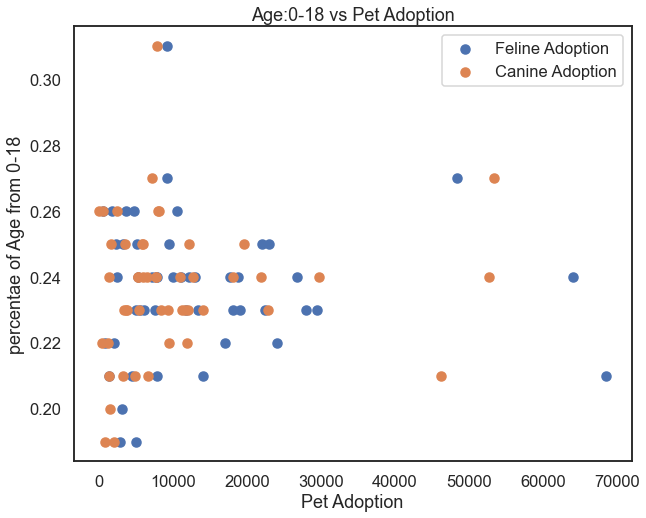

In [49]:
###First we compare the 0-18 with Feline Adoption
f3 = plt.gcf()

plt.scatter(petm_age['Feline Adoption'],age_p['0-18'],label='Feline Adoption')
plt.scatter(petm_age['Canine Adoption'],age_p['0-18'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('percentae of Age from 0-18')
plt.title('Age:0-18 vs Pet Adoption')


#### Interpretation of age group 0-18 with pet adoption
The scatterplot is used to visualize the relationship between the percentage of 0-18 with pet adoption. It is shown in the graph that the scatters mainly gathered at the left corner and the increase of percentage of 0-18 age group did not correlated with the increase in either feline or canine adoption. 

In [50]:
###Change pet adoption into log10 base because the data now is highly right skewed as there are some outliers. 
petm_age['Feline_Adoption_log']=np.log10(petm_age['Feline Adoption']+0.1)
petm_age['Canine_Adoption_log']=np.log10(petm_age['Canine Adoption']+0.1)

Text(0.5, 1.0, 'Age:0-18 vs Pet Adoption')

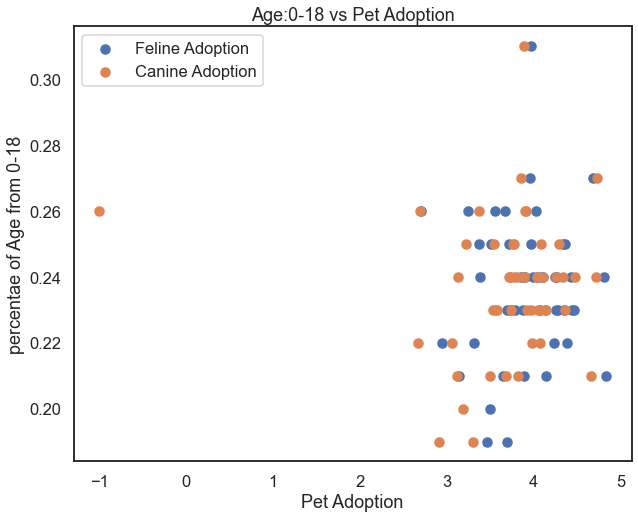

In [51]:
f4 = plt.gcf()

plt.scatter(petm_age['Feline_Adoption_log'],age_p['0-18'],label='Feline Adoption')
plt.scatter(petm_age['Canine_Adoption_log'],age_p['0-18'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('percentae of Age from 0-18')
plt.title('Age:0-18 vs Pet Adoption')

#### Interpretation of age group 0-18 with log10 pet adoption
The log10 was conducted because the previous graph was highly right skewed. This log10 was used to make sure there is no potential bias we did not see in the previous graph. This scatterplot also elaborated that the increase of percentage of 0-18 age group did not correlated with the increase in either feline or canine adoption. 

In [52]:
# carry out linear regression
#First merge the two dataset for easier coding
pet_age = petm_age.merge(age_p)

pet_age = pet_age.rename(columns = {'0-18':'zero_eighteen'})

Text(0.5, 1.0, 'Age:19-25 vs Pet Adoption')

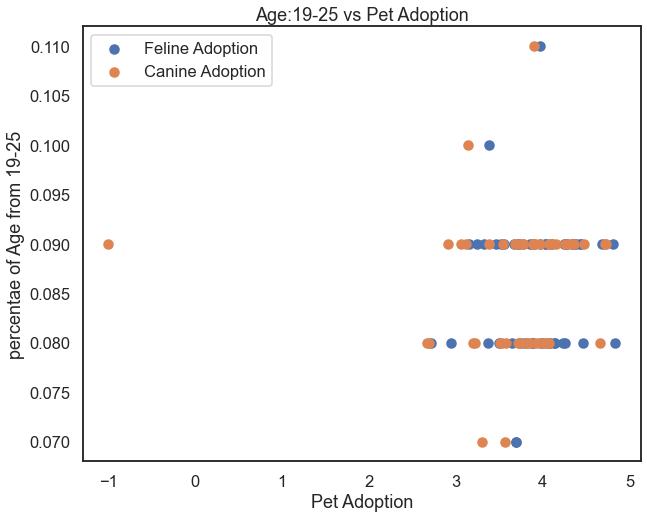

In [43]:
#Similarly we need to conduct the scatter plot for all age groups
f5 = plt.gcf()

plt.scatter(petm_age['Feline_Adoption_log'],age_p['19-25'],label='Feline Adoption')
plt.scatter(petm_age['Canine_Adoption_log'],age_p['19-25'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('percentae of Age from 19-25')
plt.title('Age:19-25 vs Pet Adoption')

#### Interpretation of age group 19-25 with log10 pet adoption
This scatterplot also elaborated that the increase of percentage of 19-25 age group did not seem to correlate with the increase in either feline or canine adoption. 

Text(0.5, 1.0, 'Age:26-34 vs Pet Adoption')

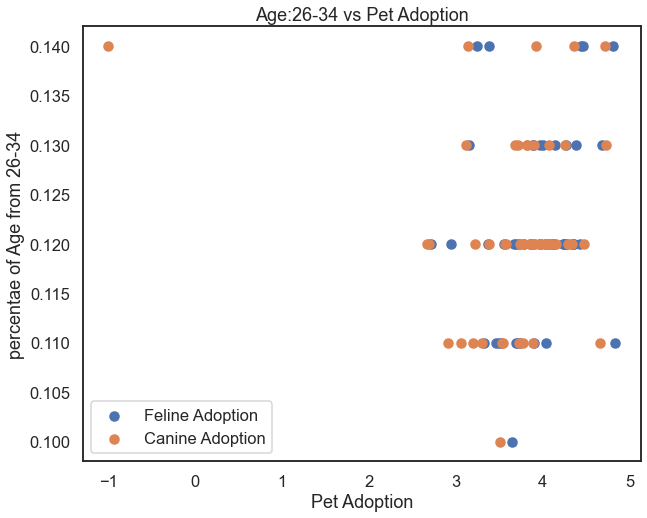

In [44]:
f6 = plt.gcf()

plt.scatter(petm_age['Feline_Adoption_log'],age_p['26-34'],label='Feline Adoption')
plt.scatter(petm_age['Canine_Adoption_log'],age_p['26-34'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('percentae of Age from 26-34')
plt.title('Age:26-34 vs Pet Adoption')

#### Interpretation of age group 26-34 with log10 pet adoption
This scatterplot also elaborated that the increase of percentage of  26-34 age group did not seem to correlate with the increase in either feline or canine adoption. 

Text(0.5, 1.0, 'Age:35-54 vs Pet Adoption')

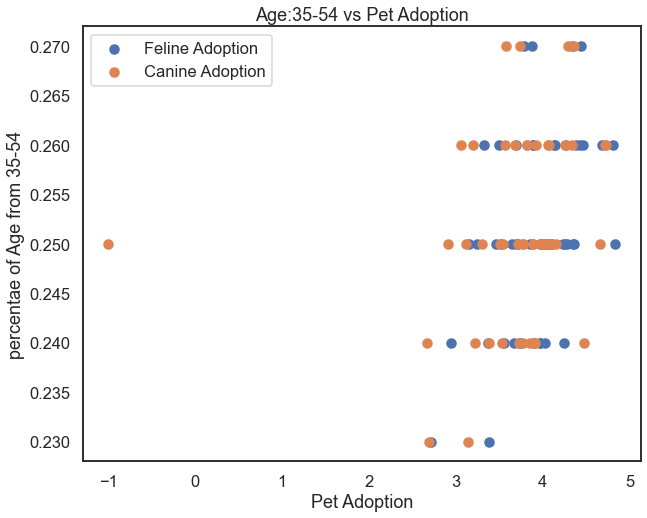

In [45]:
f7 = plt.gcf()

plt.scatter(petm_age['Feline_Adoption_log'],age_p['35-54'],label='Feline Adoption')
plt.scatter(petm_age['Canine_Adoption_log'],age_p['35-54'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('percentae of Age from 35-54')
plt.title('Age:35-54 vs Pet Adoption')

#### Interpretation of age group 35-54 with log10 pet adoption
This scatterplot also elaborated that the increase of percentage of 35-54 age group did not seem to correlate with the increase in either feline or canine adoption. 

Text(0.5, 1.0, 'Age:55-64 vs Pet Adoption')

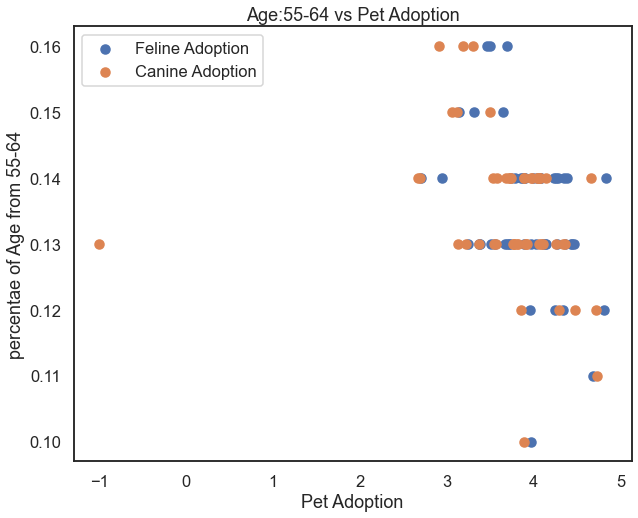

In [46]:
f8 = plt.gcf()

plt.scatter(petm_age['Feline_Adoption_log'],age_p['55-64'],label='Feline Adoption')
plt.scatter(petm_age['Canine_Adoption_log'],age_p['55-64'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('percentae of Age from 55-64')
plt.title('Age:55-64 vs Pet Adoption')

#### Interpretation of age group 55-64 with log10 pet adoption
This scatterplot also elaborated that the increase of percentage of 35-54 age group did not seem to correlate with the increase in either feline or canine adoption.

Text(0.5, 1.0, 'Age:65+ vs Pet Adoption')

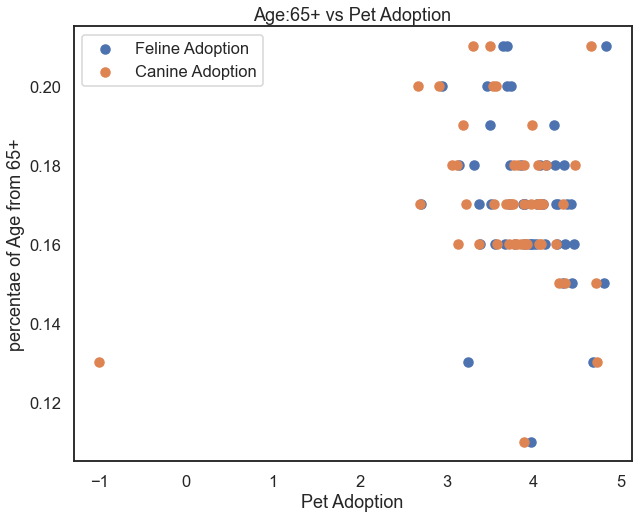

In [47]:
f9 = plt.gcf()

plt.scatter(petm_age['Feline_Adoption_log'],age_p['65+'],label='Feline Adoption')
plt.scatter(petm_age['Canine_Adoption_log'],age_p['65+'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('percentae of Age from 65+')
plt.title('Age:65+ vs Pet Adoption')

#### Interpretation of age group 65+ with log10 pet adoption
This scatterplot also elaborated that the increase of percentage of 65+ age group did not seem to correlate with the increase in either feline or canine adoption.

### Interpretation of ALL scatterplots
The scatter plot showed similar patterns between age groups and between canine and feline. There are some outliers in both non-log and log cases. But generally there is no observable difference in pet adoption among different age groups showned in the above scatter plots. We need to further conduct the linear regression to further testify our investigation.

In [48]:
#Then carry out the OSL regression
y,x=patsy.dmatrices('zero_eighteen ~ Feline_Adoption_log',pet_age)
mod=sm.OLS(y,x)
res_1=mod.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:          zero_eighteen   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1128
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.738
Time:                        10:56:10   Log-Likelihood:                 121.90
No. Observations:                  50   AIC:                            -239.8
Df Residuals:                      48   BIC:                            -236.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2273    

#### Interpretation of OLS regression: 0-18 age group and feline adoption
The P_value was greater than 0.05. Thus, we can concluded that there was No Significant between feline adoption and the percentage of 0-18 age groups. This result is aligned with our previous visualization (the scatterplot). In order to test the relationships between age and pet adoption, we also need to conduct further regression tests between feline adoption and all the age groups.

In [50]:
#Similarly, we do the regression for all age groups
pet_age = pet_age.rename(columns = {'19-25':'nineteen_twentyfive',
                                   '26-34':'twentysix_thirtyfour',
                                   '35-54':'thirtyfive_fiftyfour',
                                   '55-64':'fiftyfive_sixtyfour',
                                   '65+':'over_sixtyfive'})

pet_age

,State,Feline Adoption,Canine Adoption,Feline_Adoption_log,...,twentysix_thirtyfour,thirtyfive_fiftyfour,fiftyfive_sixtyfour,over_sixtyfive
0,AK,1755.0,0.0,3.24,...,0.14,0.25,0.13,0.13
1,AL,7181.0,7681.0,3.86,...,0.12,0.25,0.14,0.18
2,AR,3274.0,3524.0,3.52,...,0.11,0.25,0.13,0.17
...,...,...,...,...,...,...,...,...,...
47,WI,19121.0,9301.0,4.28,...,0.12,0.25,0.14,0.17
48,WV,4433.0,3196.0,3.65,...,0.10,0.25,0.15,0.21
49,WY,2362.0,1662.0,3.37,...,0.12,0.24,0.13,0.17


In [51]:
#Feline regression with age
y2,x2=patsy.dmatrices('Feline_Adoption_log ~ zero_eighteen+nineteen_twentyfive+twentysix_thirtyfour+thirtyfive_fiftyfour+fiftyfive_sixtyfour+over_sixtyfive',pet_age)
mod=sm.OLS(y2,x2)
res_2=mod.fit()
print(res_2.summary())

                             OLS Regression Results                            
Dep. Variable:     Feline_Adoption_log   R-squared:                       0.433
Model:                             OLS   Adj. R-squared:                  0.354
Method:                  Least Squares   F-statistic:                     5.481
Date:                 Wed, 01 Jun 2022   Prob (F-statistic):           0.000277
Time:                         10:56:10   Log-Likelihood:                -16.728
No. Observations:                   50   AIC:                             47.46
Df Residuals:                       43   BIC:                             60.84
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

#### Interpretation of OLS regression: ALL age group and feline adoption
The P_value of intercept was greater than 0.05. Thus, we can concluded that there was No Significant between feline adoption and the percentage age groups. This result is aligned with our previous visualization (the scatterplot). In order to test the relationships between age and pet adoption, we also need to conduct further regression tests between canine adoption and all the age groups.

In [52]:
#Canine regression with age
y3,x3=patsy.dmatrices('Canine_Adoption_log ~ zero_eighteen+nineteen_twentyfive+twentysix_thirtyfour+thirtyfive_fiftyfour+fiftyfive_sixtyfour+over_sixtyfive',pet_age)
mod=sm.OLS(y3,x3)
res_3=mod.fit()
print(res_3.summary())

                             OLS Regression Results                            
Dep. Variable:     Canine_Adoption_log   R-squared:                       0.320
Model:                             OLS   Adj. R-squared:                  0.226
Method:                  Least Squares   F-statistic:                     3.379
Date:                 Wed, 01 Jun 2022   Prob (F-statistic):            0.00809
Time:                         10:56:10   Log-Likelihood:                -51.253
No. Observations:                   50   AIC:                             116.5
Df Residuals:                       43   BIC:                             129.9
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

#### Interpretation of OLS regression: ALL age group and canine adoption
The P_value was greater than 0.05. Thus, we can concluded that there was No Significant between canine adoption and the percentage age groups. This result is aligned with our previous visualization (the scatterplot). 

### Interpretation of regression
The regression result showed no relationship between either Feline or Canine adoption has a positive or negative relationship with age. Therefore, the difference of adoption number in different States is merely influenced by the age strucutre of the state.

## EDA of Race and Pet Adoption

Since we are researching pet adoption rate per state relative to racial background, we should take into account state population differences and replace population count with proportions.

In [53]:
rc[['White Alone', 'Black Alone', 'Asian Alone','Hispanic','Hawaiian or Pacific Islander Alone','American Indian or Alaskan Native','Two or More Races']] = rc[['White Alone', 'Black Alone', 'Asian Alone','Hispanic','Hawaiian or Pacific Islander Alone','American Indian or Alaskan Native','Two or More Races']].apply(lambda x: x/x.sum(), axis=1)
#drop total column since it's useless now
rc_p = rc.drop(columns=['Total'])
#drop the year since we know it's all for 2019
rc_p = rc_p.drop(columns=['Year'])
rc_p.head()

,State,White Alone,Black Alone,Asian Alone,Hispanic,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races
0,Alabama,0.66,0.26,0.01,0.04,9.97e-04,6.79e-03,0.02
1,Alaska,0.61,0.03,0.06,0.07,1.34e-02,1.45e-01,0.07
2,Arizona,0.63,0.04,0.03,0.24,2.10e-03,4.02e-02,0.02
3,Arkansas,0.73,0.15,0.02,0.07,3.62e-03,9.44e-03,0.02
4,California,0.52,0.05,0.11,0.28,3.63e-03,1.18e-02,0.03


Now that we have the proportions, we can compare the racial makeup of each state.

### Distribution

We first want to figure out the racial distribution of each state. We will do this by finding the largest racial group in each state.

Text(0.5, 0, 'State')

<Figure size 720x576 with 0 Axes>

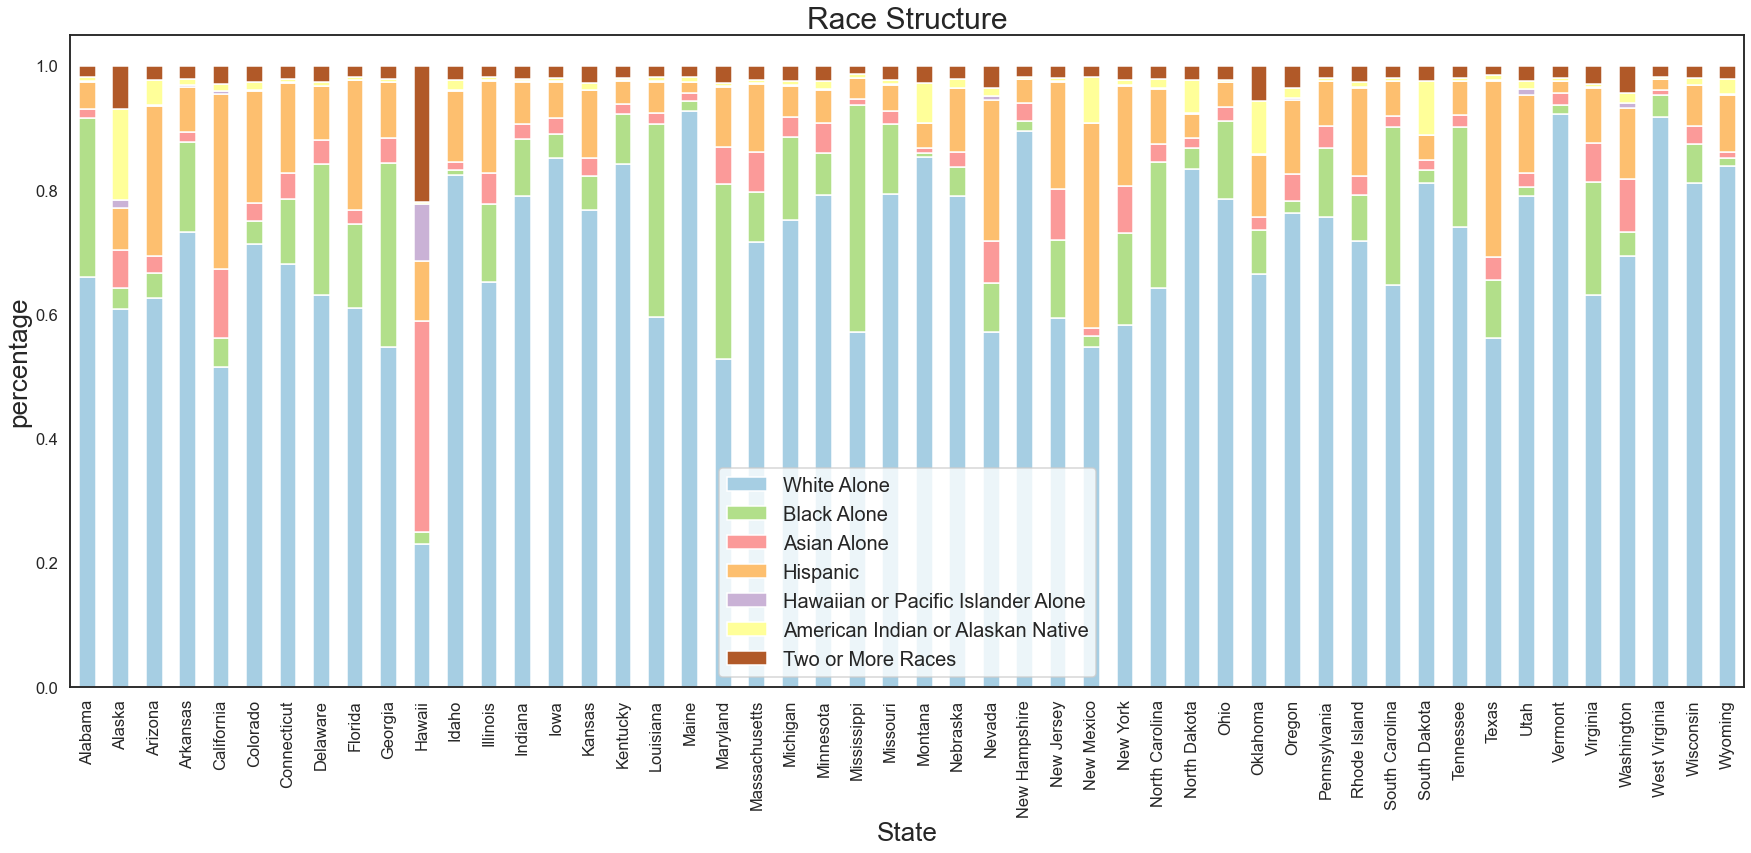

In [54]:
#Plot a the racial distribution for each state
plt.figure()
plt.rcParams['font.size'] = '20'
ax1 = rc_p.plot(x='State', kind='bar', stacked=True,
           colormap='Paired',figsize=(30,12))
ax1.set_title('Race Structure',fontdict={'fontsize':30})
ax1.legend(loc=8,fontsize=20)
ax1.set_ylabel('percentage',fontdict={'fontsize':26})
ax1.set_xlabel('State',fontdict={'fontsize':26})

We can see that Hawaii's racial distribution is vastly different from other states. In Hawaii, "White Alone" is the second largest group whereas in every other state it is without a doubt the largest group. We will take note of this outlier and observe how it may affect our analysis later.

Now let's evaluate which states has the largest proportion of each racial group (minus "White Alone).

In [55]:
Black_most = rc_p.sort_values('Black Alone', ascending = False)
Black_most.head()

,State,White Alone,Black Alone,Asian Alone,Hispanic,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races
23,Mississippi,0.57,0.37,0.01,0.03,5.87e-04,6.08e-03,0.01
17,Louisiana,0.60,0.31,0.02,0.05,5.83e-04,7.48e-03,0.02
9,Georgia,0.55,0.30,0.04,0.09,1.06e-03,4.80e-03,0.02
19,Maryland,0.53,0.28,0.06,0.10,1.00e-03,5.51e-03,0.03
0,Alabama,0.66,0.26,0.01,0.04,9.97e-04,6.79e-03,0.02


In [56]:
Asian_most = rc_p.sort_values('Asian Alone', ascending = False)
Asian_most.head()

,State,White Alone,Black Alone,Asian Alone,Hispanic,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races
10,Hawaii,0.23,0.02,0.34,0.10,9.16e-02,3.56e-03,0.22
4,California,0.52,0.05,0.11,0.28,3.63e-03,1.18e-02,0.03
46,Washington,0.69,0.04,0.08,0.12,7.01e-03,1.71e-02,0.04
29,New Jersey,0.59,0.12,0.08,0.17,9.54e-04,5.16e-03,0.02
31,New York,0.58,0.15,0.08,0.16,1.17e-03,8.18e-03,0.02


In [57]:
Hispanic_most = rc_p.sort_values('Hispanic', ascending = False)
Hispanic_most.head()

,State,White Alone,Black Alone,Asian Alone,Hispanic,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races
30,New Mexico,0.55,0.02,0.01,0.33,1.07e-03,7.34e-02,0.02
42,Texas,0.56,0.09,0.04,0.28,1.07e-03,7.28e-03,0.01
4,California,0.52,0.05,0.11,0.28,3.63e-03,1.18e-02,0.03
2,Arizona,0.63,0.04,0.03,0.24,2.10e-03,4.02e-02,0.02
27,Nevada,0.57,0.08,0.07,0.23,6.18e-03,1.30e-02,0.04


In [58]:
Pacific_most = rc_p.sort_values('Hawaiian or Pacific Islander Alone', ascending = False)
Pacific_most.head()

,State,White Alone,Black Alone,Asian Alone,Hispanic,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races
10,Hawaii,0.23,0.02,0.34,0.10,9.16e-02,3.56e-03,0.22
1,Alaska,0.61,0.03,0.06,0.07,1.34e-02,1.45e-01,0.07
43,Utah,0.79,0.01,0.02,0.13,9.26e-03,1.36e-02,0.02
46,Washington,0.69,0.04,0.08,0.12,7.01e-03,1.71e-02,0.04
27,Nevada,0.57,0.08,0.07,0.23,6.18e-03,1.30e-02,0.04


In [59]:
Native_most = rc_p.sort_values('American Indian or Alaskan Native', ascending = False)
Native_most.head()

,State,White Alone,Black Alone,Asian Alone,Hispanic,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races
1,Alaska,0.61,3.45e-02,6.09e-02,0.07,1.34e-02,0.15,0.07
40,South Dakota,0.81,2.21e-02,1.49e-02,0.04,8.54e-04,0.09,0.02
35,Oklahoma,0.67,7.00e-02,2.14e-02,0.10,1.95e-03,0.08,0.06
30,New Mexico,0.55,1.75e-02,1.20e-02,0.33,1.07e-03,0.07,0.02
25,Montana,0.85,5.75e-03,8.84e-03,0.04,8.27e-04,0.06,0.03


In [60]:
Mix_most = rc_p.sort_values('Two or More Races', ascending = False)
Mix_most.head()

,State,White Alone,Black Alone,Asian Alone,Hispanic,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races
10,Hawaii,0.23,0.02,0.34,0.10,9.16e-02,3.56e-03,0.22
1,Alaska,0.61,0.03,0.06,0.07,1.34e-02,1.45e-01,0.07
35,Oklahoma,0.67,0.07,0.02,0.10,1.95e-03,8.44e-02,0.06
46,Washington,0.69,0.04,0.08,0.12,7.01e-03,1.71e-02,0.04
27,Nevada,0.57,0.08,0.07,0.23,6.18e-03,1.30e-02,0.04


Coinciding with our previous plot, Hawaii is a state with big proportions of non-white citizens. In addition to Hawaii, a few states hold a more diverse population than others, such as New Mexico, Alaska, Nevada, Washington, Oklahoma, and California. These states appear at least twice at top 5 in our listed charts.

## Relationship Analysis - Race and Pet Adoption

Now that we have an idea of the racial structure in each state, we can continue to analyze the relationship between race and pet adoption in each state.

To do this, we first need to make the two datasets compatible.

In [61]:
#Because the pet dataset follows an alphabetical order of the abbreviations, we will need to rename 
#our state names to abbreviations
rc_p['state_ab']=['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
     'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
     'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
     'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
     'SD', 'TN', 'TX','UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
rc_p = rc_p.sort_values('state_ab')

#The pet_median dataframe is 53 rows, 3 rows longer than rc_p
#We need to drop the rows which was in the pet_median, but not in rc_p in order to do further analysis
#W do not want to change the pet_median dataframe thus we'll create a new dataset for pet called "petm_rc"
pet_median.reset_index(drop=True)
df_diff = pd.concat([pet_median['State'],rc_p['state_ab']]).drop_duplicates(keep=False)
print (df_diff)
#Now we find out the difference, we need to 
petm_rc = pet_median.drop([7,39,47])
petm_rc.reset_index(drop=True)

#We double-check there're no missmatches and rename the columns
rc_p = rc_p.rename(columns = {'State':'State-full',
                                'state_ab':'State'})

rc_p

7     DC
39    PR
47    VI
dtype: object


,State-full,White Alone,Black Alone,Asian Alone,...,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races,State
1,Alaska,0.61,0.03,6.09e-02,...,1.34e-02,1.45e-01,0.07,AK
0,Alabama,0.66,0.26,1.44e-02,...,9.97e-04,6.79e-03,0.02,AL
3,Arkansas,0.73,0.15,1.55e-02,...,3.62e-03,9.44e-03,0.02,AR
...,...,...,...,...,...,...,...,...,...
48,Wisconsin,0.81,0.06,2.81e-02,...,5.48e-04,1.10e-02,0.02,WI
47,West Virginia,0.92,0.04,8.06e-03,...,2.91e-04,2.51e-03,0.02,WV
49,Wyoming,0.84,0.01,1.03e-02,...,9.35e-04,2.48e-02,0.02,WY


First we will compare the 'White Alone' group with Feline Adoption and Canine Adoption

Text(0.5, 1.0, 'White Alone vs Pet Adoption')

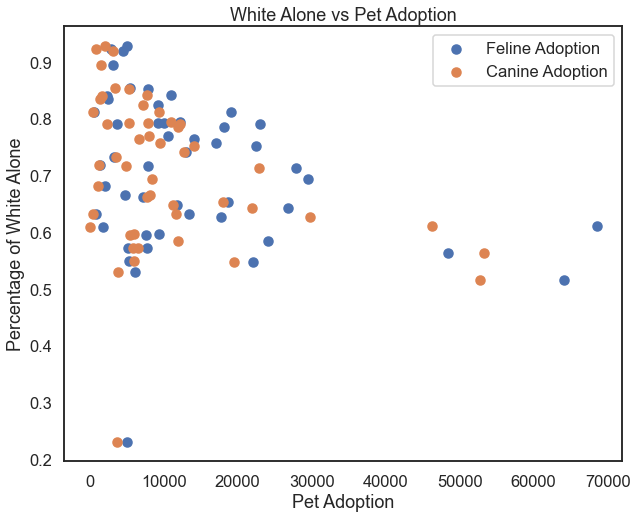

In [62]:
f1 = plt.gcf()

plt.scatter(petm_rc['Feline Adoption'],rc_p['White Alone'],label='Feline Adoption')
plt.scatter(petm_rc['Canine Adoption'],rc_p['White Alone'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of White Alone')
plt.title('White Alone vs Pet Adoption')

In [63]:
###Change pet adoption into log10 base because the scatterplot is highly right skewed because of outliers
petm_rc['Feline_Adoption_log']=np.log10(petm_rc['Feline Adoption'])
petm_rc['Canine_Adoption_log']=np.log10(petm_rc['Canine Adoption'])

/Users/yifei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'White Alone vs Pet Adoption')

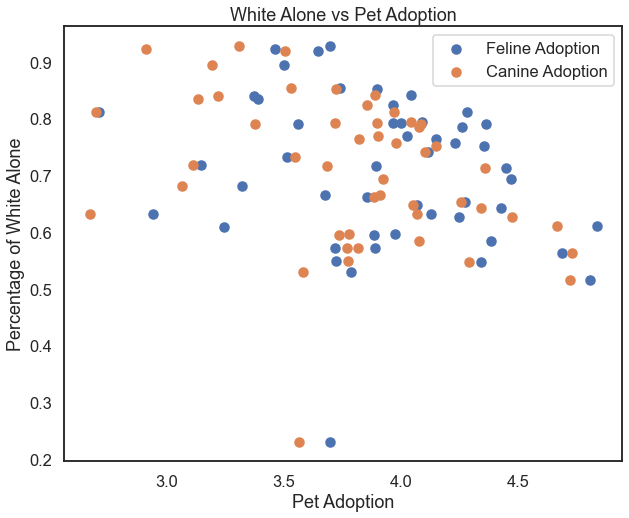

In [64]:
f2 = plt.gcf()

plt.scatter(petm_rc['Feline_Adoption_log'],rc_p['White Alone'],label='Feline Adoption')
plt.scatter(petm_rc['Canine_Adoption_log'],rc_p['White Alone'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of White Alone')
plt.title('White Alone vs Pet Adoption')

In [65]:
###Change pet adoption into log10 base because the scatterplot is highly right skewed because of outliers
petm_rc['Feline_Adoption_log']=np.log10(petm_rc['Feline Adoption'])
petm_rc['Canine_Adoption_log']=np.log10(petm_rc['Canine Adoption'])

Text(0.5, 1.0, 'Black Alone vs Pet Adoption')

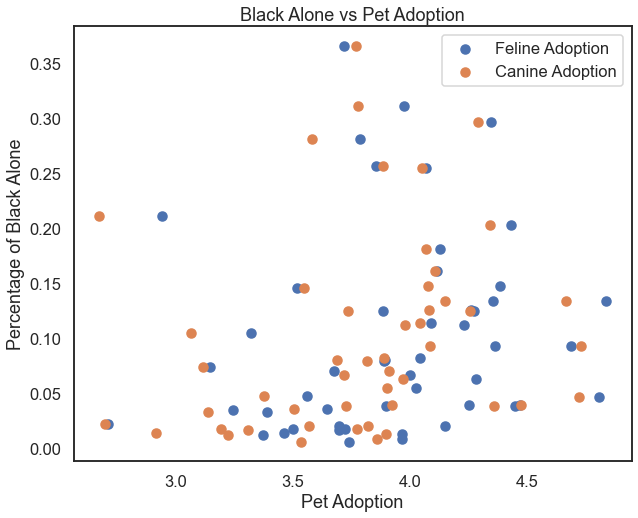

In [66]:
plt.scatter(petm_rc['Feline_Adoption_log'],rc_p['Black Alone'],label='Feline Adoption')
plt.scatter(petm_rc['Canine_Adoption_log'],rc_p['Black Alone'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of Black Alone')
plt.title('Black Alone vs Pet Adoption')

Text(0.5, 1.0, 'Asian Alone vs Pet Adoption')

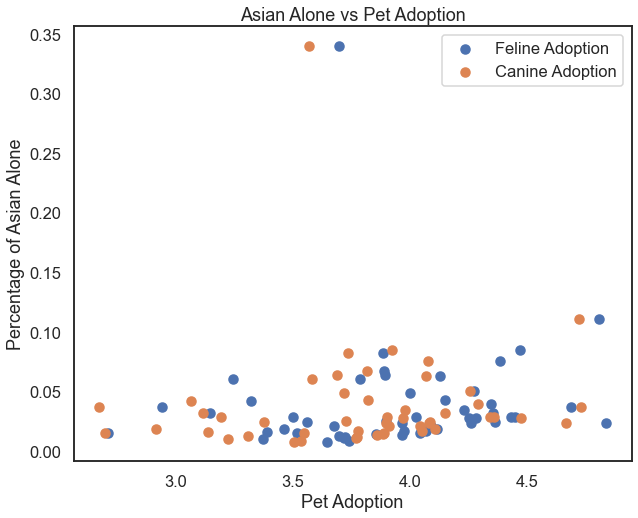

In [67]:
plt.scatter(petm_rc['Feline_Adoption_log'],rc_p['Asian Alone'],label='Feline Adoption')
plt.scatter(petm_rc['Canine_Adoption_log'],rc_p['Asian Alone'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of Asian Alone')
plt.title('Asian Alone vs Pet Adoption')

Text(0.5, 1.0, 'Hispanic vs Pet Adoption')

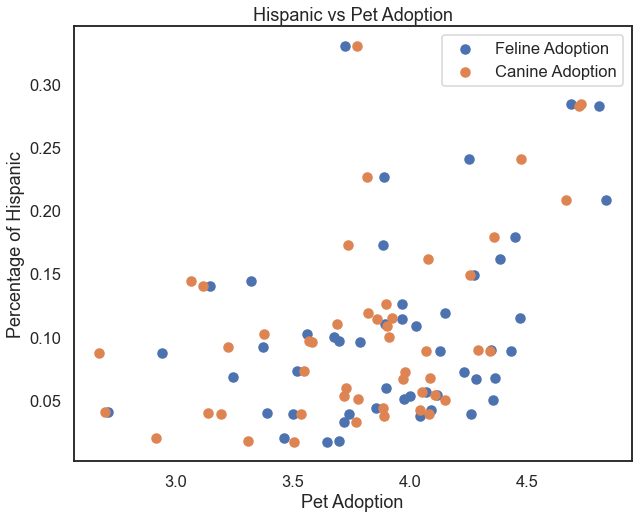

In [68]:
plt.scatter(petm_rc['Feline_Adoption_log'],rc_p['Hispanic'],label='Feline Adoption')
plt.scatter(petm_rc['Canine_Adoption_log'],rc_p['Hispanic'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of Hispanic')
plt.title('Hispanic vs Pet Adoption')

Text(0.5, 1.0, 'Hawaiian or Pacific Islander Alone vs Pet Adoption')

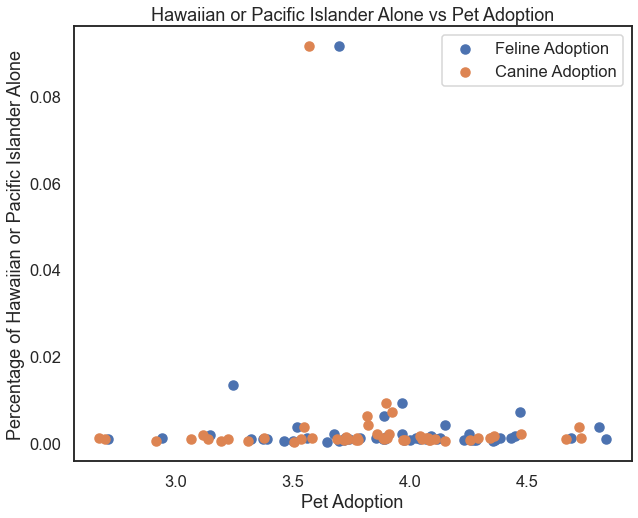

In [69]:
plt.scatter(petm_rc['Feline_Adoption_log'],rc_p['Hawaiian or Pacific Islander Alone'],label='Feline Adoption')
plt.scatter(petm_rc['Canine_Adoption_log'],rc_p['Hawaiian or Pacific Islander Alone'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of Hawaiian or Pacific Islander Alone')
plt.title('Hawaiian or Pacific Islander Alone vs Pet Adoption')

Text(0.5, 1.0, 'American Indian or Alaskan Native vs Pet Adoption')

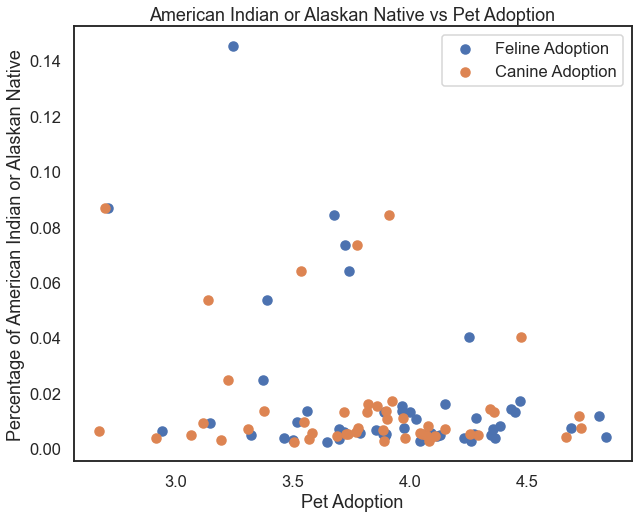

In [70]:
plt.scatter(petm_rc['Feline_Adoption_log'],rc_p['American Indian or Alaskan Native'],label='Feline Adoption')
plt.scatter(petm_rc['Canine_Adoption_log'],rc_p['American Indian or Alaskan Native'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of American Indian or Alaskan Native')
plt.title('American Indian or Alaskan Native vs Pet Adoption')

Text(0.5, 1.0, 'Two or More Races vs Pet Adoption')

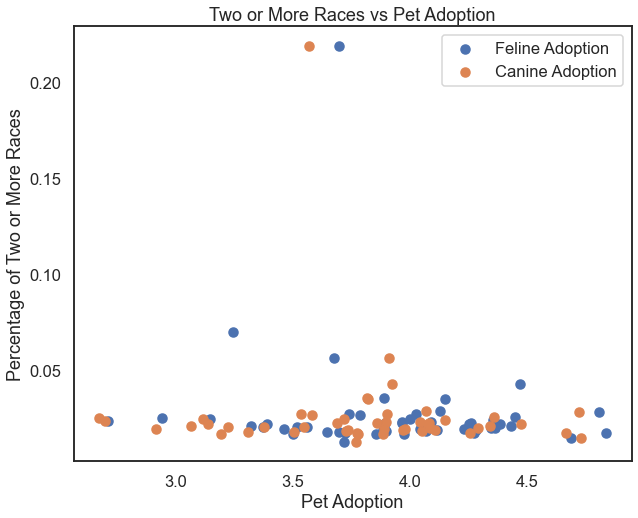

In [71]:
plt.scatter(petm_rc['Feline_Adoption_log'],rc_p['Two or More Races'],label='Feline Adoption')
plt.scatter(petm_rc['Canine_Adoption_log'],rc_p['Two or More Races'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of Two or More Races')
plt.title('Two or More Races vs Pet Adoption')

Scanning through the scatterplots, there always seems to be around two outliers that stray far from other spots.
Let's identify which states they are.

In [72]:
#Outlier state for 'White Alone'
rc_p[rc_p['White Alone'] < 0.5]

,State-full,White Alone,Black Alone,Asian Alone,...,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races,State
10,Hawaii,0.23,0.02,0.34,...,0.09,3.56e-03,0.22,HI


In [73]:
#No clearly indentifiable outliers for 'Black Alone'

In [74]:
#Outlier state for 'Asian Alone'
rc_p[rc_p['Asian Alone'] > 0.3]

,State-full,White Alone,Black Alone,Asian Alone,...,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races,State
10,Hawaii,0.23,0.02,0.34,...,0.09,3.56e-03,0.22,HI


In [75]:
#Outlier state for 'Hispanic'
rc_p[rc_p['Hispanic'] > 0.25]

,State-full,White Alone,Black Alone,Asian Alone,...,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races,State
4,California,0.52,0.05,0.11,...,3.63e-03,1.18e-02,0.03,CA
30,New Mexico,0.55,0.02,0.01,...,1.07e-03,7.34e-02,0.02,NM
42,Texas,0.56,0.09,0.04,...,1.07e-03,7.28e-03,0.01,TX


In [76]:
#Outlier state for 'Hawaiian or Pacific Islander Alone'
rc_p[rc_p['Hawaiian or Pacific Islander Alone'] > 0.08]

,State-full,White Alone,Black Alone,Asian Alone,...,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races,State
10,Hawaii,0.23,0.02,0.34,...,0.09,3.56e-03,0.22,HI


In [77]:
#Outlier state for 'American Indian or Alaskan Native'
rc_p[rc_p['American Indian or Alaskan Native'] > 0.12]

,State-full,White Alone,Black Alone,Asian Alone,...,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races,State
1,Alaska,0.61,0.03,0.06,...,0.01,0.15,0.07,AK


In [78]:
#Outlier state for 'Two or More Races'
rc_p[rc_p['Two or More Races'] > 0.2]

,State-full,White Alone,Black Alone,Asian Alone,...,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races,State
10,Hawaii,0.23,0.02,0.34,...,0.09,3.56e-03,0.22,HI


Results show that Hawaii is a common outlier in our research on race and pet adoption. For now, because Hawaii is stretching our scatterplots (and because Hawaii doesn't seem to have a very large pet adoption number relative to other states), we will drop Hawaii and redraw some of our scatterplots.


In [79]:
rc_ph = rc_p.drop(labels=[10], axis=0)

In [80]:
#drop Hawaii in pet adoption dataframe
pet_median.reset_index(drop=True)
df_diff = pd.concat([pet_median['State'],rc_ph['State']]).drop_duplicates(keep=False)
print (df_diff)
#Now we find out the difference, we need to 
petm_rch = pet_median.drop([7,39,47,11])
petm_rch.reset_index(drop=True)
rc_ph

7     DC
11    HI
39    PR
47    VI
Name: State, dtype: object


,State-full,White Alone,Black Alone,Asian Alone,...,Hawaiian or Pacific Islander Alone,American Indian or Alaskan Native,Two or More Races,State
1,Alaska,0.61,0.03,6.09e-02,...,1.34e-02,1.45e-01,0.07,AK
0,Alabama,0.66,0.26,1.44e-02,...,9.97e-04,6.79e-03,0.02,AL
3,Arkansas,0.73,0.15,1.55e-02,...,3.62e-03,9.44e-03,0.02,AR
...,...,...,...,...,...,...,...,...,...
48,Wisconsin,0.81,0.06,2.81e-02,...,5.48e-04,1.10e-02,0.02,WI
47,West Virginia,0.92,0.04,8.06e-03,...,2.91e-04,2.51e-03,0.02,WV
49,Wyoming,0.84,0.01,1.03e-02,...,9.35e-04,2.48e-02,0.02,WY


In [81]:
petm_rch['Feline_Adoption_log']=np.log10(petm_rc['Feline Adoption'])
petm_rch['Canine_Adoption_log']=np.log10(petm_rc['Canine Adoption'])

/Users/yifei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'White Alone vs Pet Adoption')

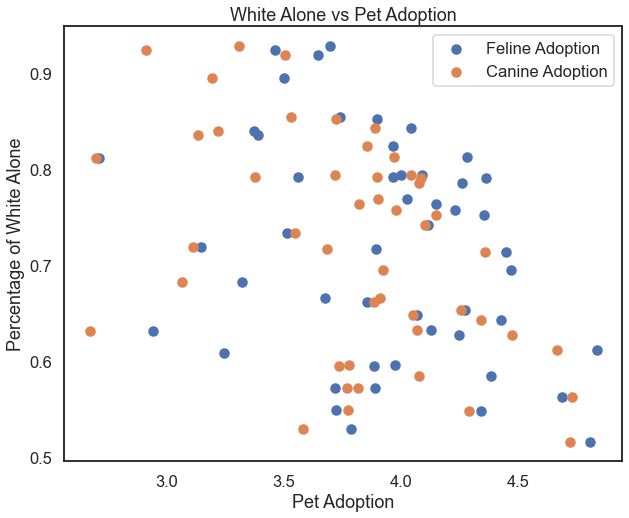

In [82]:
plt.scatter(petm_rch['Feline_Adoption_log'],rc_ph['White Alone'],label='Feline Adoption')
plt.scatter(petm_rch['Canine_Adoption_log'],rc_ph['White Alone'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of White Alone')
plt.title('White Alone vs Pet Adoption')

Text(0.5, 1.0, 'Black Alone vs Pet Adoption')

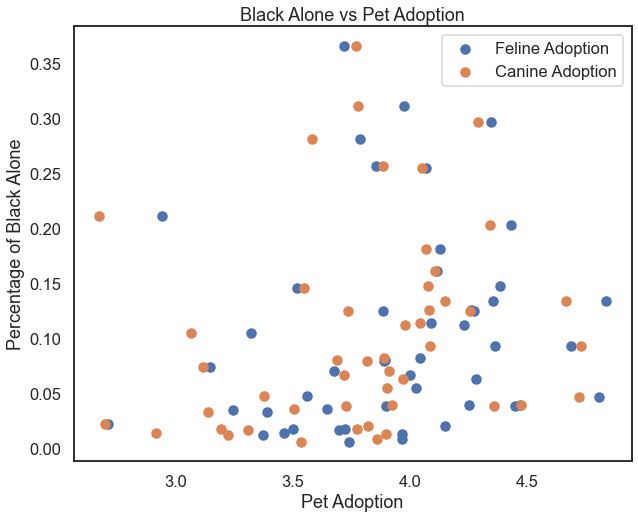

In [83]:
plt.scatter(petm_rch['Feline_Adoption_log'],rc_ph['Black Alone'],label='Feline Adoption')
plt.scatter(petm_rch['Canine_Adoption_log'],rc_ph['Black Alone'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of Black Alone')
plt.title('Black Alone vs Pet Adoption')

Text(0.5, 1.0, 'Hispanic vs Pet Adoption')

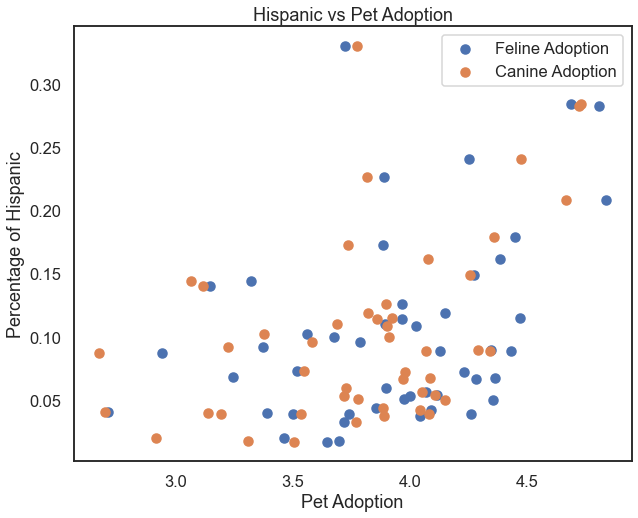

In [84]:
plt.scatter(petm_rch['Feline_Adoption_log'],rc_ph['Hispanic'],label='Feline Adoption')
plt.scatter(petm_rch['Canine_Adoption_log'],rc_ph['Hispanic'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of Hispanic')
plt.title('Hispanic vs Pet Adoption')

Text(0.5, 1.0, 'Asian Alone vs Pet Adoption')

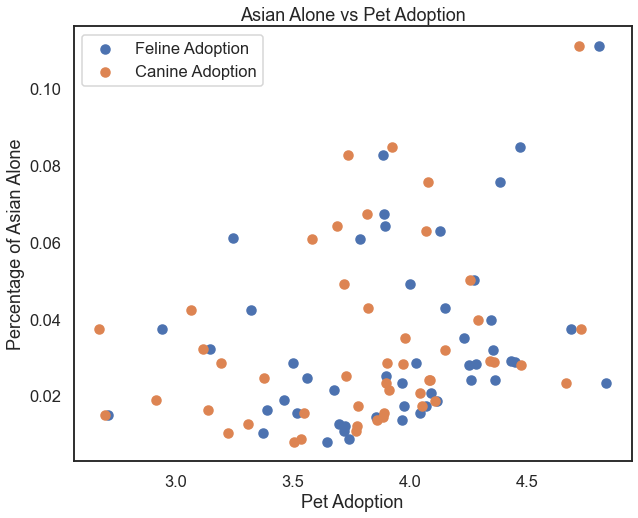

In [85]:
plt.scatter(petm_rch['Feline_Adoption_log'],rc_ph['Asian Alone'],label='Feline Adoption')
plt.scatter(petm_rch['Canine_Adoption_log'],rc_ph['Asian Alone'],label='Canine Adoption')
plt.legend()
plt.xlabel('Pet Adoption')
plt.ylabel('Percentage of Asian Alone')
plt.title('Asian Alone vs Pet Adoption')

## Linear Regression

In [86]:
#Carry out linear regression
#First merge the two datasets for easier coding
pet_rc = petm_rc.merge(rc_ph)

pet_rc = pet_rc.rename(columns = {'Black Alone':'Black'})

In [87]:
y,x=patsy.dmatrices('Feline_Adoption_log ~ Black',pet_rc)
mod=sm.OLS(y,x)
res_1=mod.fit()
print(res_1.summary())

                             OLS Regression Results                            
Dep. Variable:     Feline_Adoption_log   R-squared:                       0.022
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.048
Date:                 Wed, 01 Jun 2022   Prob (F-statistic):              0.311
Time:                         10:56:14   Log-Likelihood:                -30.138
No. Observations:                   49   AIC:                             64.28
Df Residuals:                       47   BIC:                             68.06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8514      0.099     38.71

In [88]:
#p_value = 0.31 > 0.05
#No significance

In [89]:
#Similarly, let's use regression for all age groups
pet_rc = pet_rc.rename(columns = {'White Alone':'White',
                                   'Asian Alone':'Asian',
                                   'Hispanic':'Hispanic',
                                   'Hawaiian or Pacific Islander Alone':'Pacific',
                                   'American Indian or Alaskan Native':'Native',
                                   'Two or More Races':'Mixed'
                                 })

Previously we summed up all the racial groups to calculate the total population of each state. Then we changed counts into proportions. This decision allowed all the racial proportions to be dependent on each other. To prevent a multicollinearity issue, we decided to take out the two smallest groups "Two or More Races" and "Hawaiian or Pacific Islander Alone':'Pacific" to ensure the variables are not dependent on each other.

In [90]:
#Feline regression with race
y2,x2=patsy.dmatrices('Feline_Adoption_log ~ White+Black+Asian+Hispanic+Native', pet_rc)
mod=sm.OLS(y2,x2)
res_2=mod.fit()
print(res_2.summary())

                             OLS Regression Results                            
Dep. Variable:     Feline_Adoption_log   R-squared:                       0.358
Model:                             OLS   Adj. R-squared:                  0.283
Method:                  Least Squares   F-statistic:                     4.794
Date:                 Wed, 01 Jun 2022   Prob (F-statistic):            0.00143
Time:                         10:56:14   Log-Likelihood:                -19.823
No. Observations:                   49   AIC:                             51.65
Df Residuals:                       43   BIC:                             63.00
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5886      8.095      1.55

Although all the coefficients are negative, none of the p_values are smaller than 0.05, hence we cannot find a significant relationship between racial distribution and feline adoption rate.

In [91]:
#Because Alaska has 0 canine adoption in 2019, its value will cause an error in our linear regression model
#We will have to drop Alaska from our model
pet_rc = pet_rc.drop(labels=[0], axis=0)

In [92]:
#Canine regression with race
y3,x3=patsy.dmatrices('Canine_Adoption_log ~ White+Black+Asian+Hispanic+Native',pet_rc)
mod=sm.OLS(y3,x3)
res_3=mod.fit()
print(res_3.summary())

                             OLS Regression Results                            
Dep. Variable:     Canine_Adoption_log   R-squared:                       0.349
Model:                             OLS   Adj. R-squared:                  0.272
Method:                  Least Squares   F-statistic:                     4.511
Date:                 Wed, 01 Jun 2022   Prob (F-statistic):            0.00222
Time:                         10:56:14   Log-Likelihood:                -22.183
No. Observations:                   48   AIC:                             56.37
Df Residuals:                       42   BIC:                             67.59
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2888      9.179      1.55

None of the p-values are smaller than 0.05.

In conclusion, there is no significant relationship between pet adoption and racial distritbution across states in the US.

## EDA-Income

### Income-distribution by state

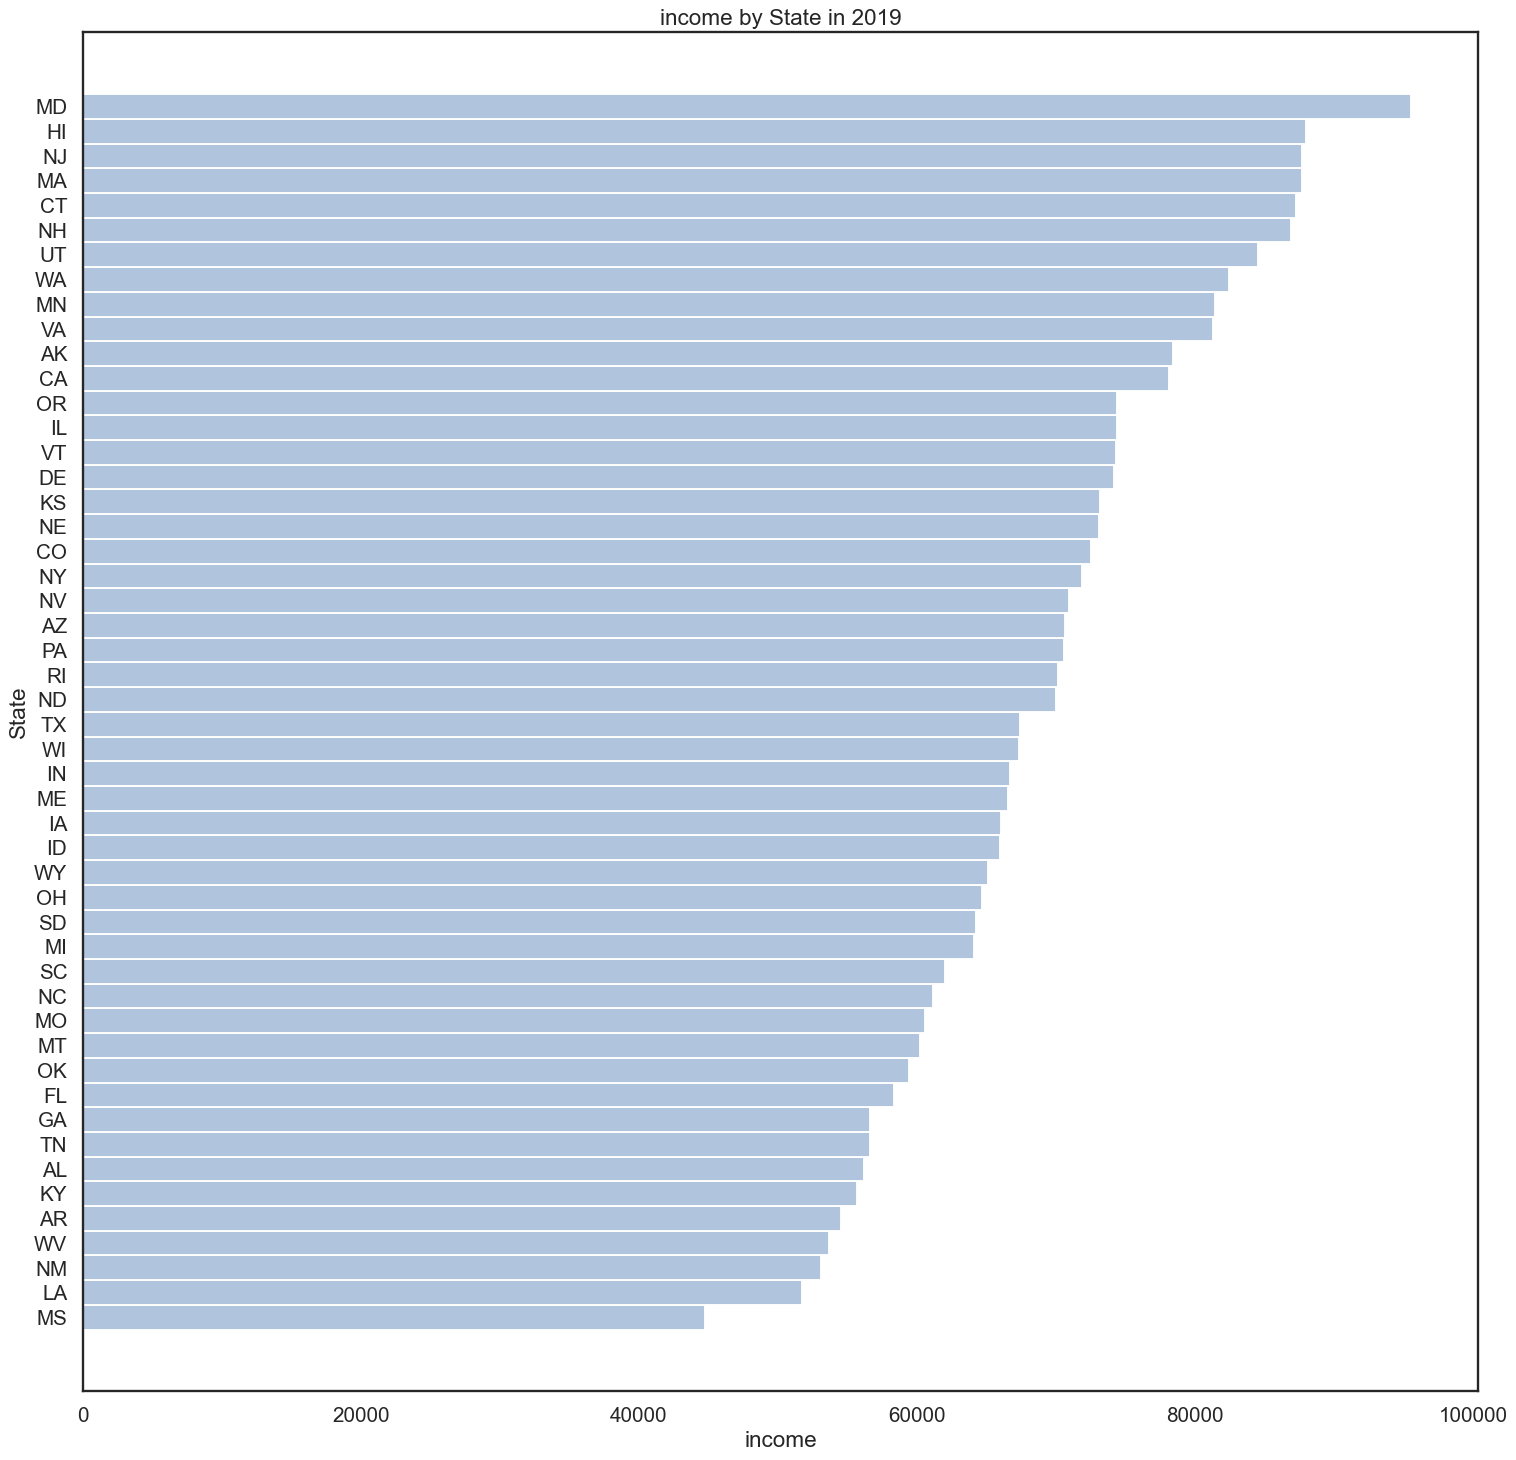

In [93]:
# firstly looking at the barplot of sorted income and state
income_sort = income.sort_values('income2019')

width = 1
plt.figure(figsize=(20,20), dpi= 90)
plt.barh(income_sort['State'], income_sort['income2019'],width, color='lightsteelblue')
plt.title("income by State in 2019", fontsize=18)
plt.xlabel('income')
plt.ylabel('State')
f1 = plt.gcf()

### Interpretation of income distribution, outliers
1. From the plot, we notice that the first several states that have the highest income in 2019 is Maryland, Hawaii, NweJersey, Massachusetts, and Connecticut.Those which have the lowest income in 2019 are Mississippi, Louisiana, New Mexico, West Virginia, and Arkansas.

2. The outliers are Mariland and Mississippi, which has the highest income in 2019 and lowest income in 2019. However, there is not a huge gap between outliers and the major part of the data, and since we are exploring the relationship between income and pet adoption, the outliers are fine and not have to be deducted.

### Data Exploration

In [94]:
#merge the two datasets
income_pet = income.merge(pet_median, how = 'inner', on = 'State' )
income_pet = income_pet.rename(columns={"Feline Adoption": "Feline_Adoption", 
                           "Canine Adoption": "Canine_Adoption"}, errors="raise")
income_pet.head()

,State,income2019,Feline_Adoption,Canine_Adoption
0,AL,56200.0,7181.0,7681.0
1,AK,78394.0,1755.0,0.0
2,AZ,70674.0,17735.0,29709.0
3,AR,54539.0,3274.0,3524.0
4,CA,78105.0,64086.0,52723.0


Text(0, 0.5, 'Feline_Adoption')

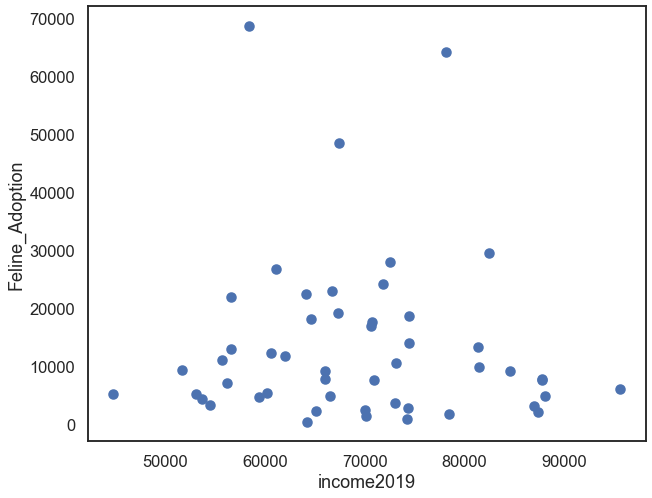

In [95]:
#take a look at original data - feline
plt.scatter(income_pet['income2019'], income_pet['Feline_Adoption'])
plt.xlabel('income2019')
plt.ylabel('Feline_Adoption')

Text(0, 0.5, 'Canine_Adoption')

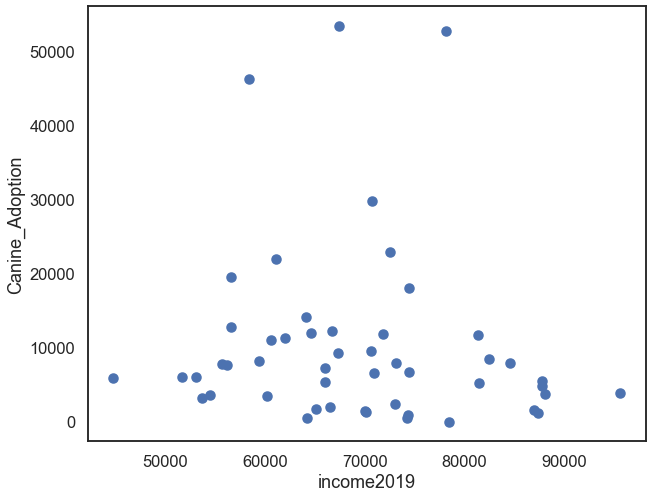

In [96]:
#original data - caline
plt.scatter(income_pet['income2019'], income_pet['Canine_Adoption'])
plt.xlabel('income2019')
plt.ylabel('Canine_Adoption')

We can see that the distribution of Faline or Caline are similar and condensed at the bottom. So we will apply log function on them to make the distribution more obvious.

In [97]:
# add log10 columns
income_pet['Feline_log10'] = np.log10(income_pet['Feline_Adoption'] + 1)
income_pet['Canine_log10'] = np.log10(income_pet['Canine_Adoption'] + 1)
income_pet.head()

,State,income2019,Feline_Adoption,Canine_Adoption,Feline_log10,Canine_log10
0,AL,56200.0,7181.0,7681.0,3.86,3.89
1,AK,78394.0,1755.0,0.0,3.24,0.00
2,AZ,70674.0,17735.0,29709.0,4.25,4.47
3,AR,54539.0,3274.0,3524.0,3.52,3.55
4,CA,78105.0,64086.0,52723.0,4.81,4.72


Text(0, 0.5, 'Feline_log10')

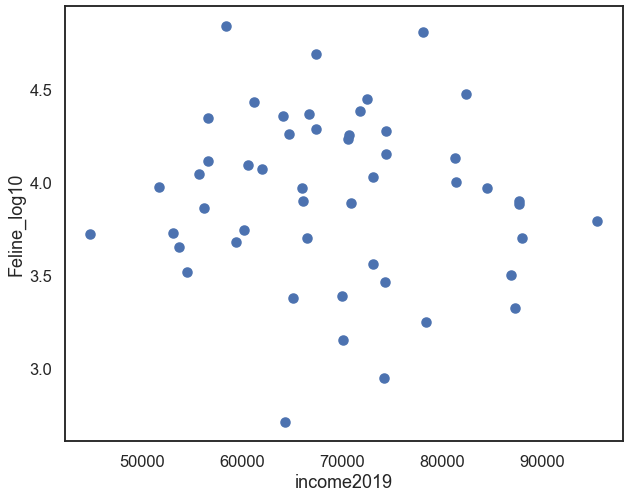

In [98]:
# look at the scatter plot again - feline
plt.scatter(income_pet['income2019'], income_pet['Feline_log10'])
plt.xlabel('income2019')
plt.ylabel('Feline_log10')

Text(0, 0.5, 'Canine_log10')

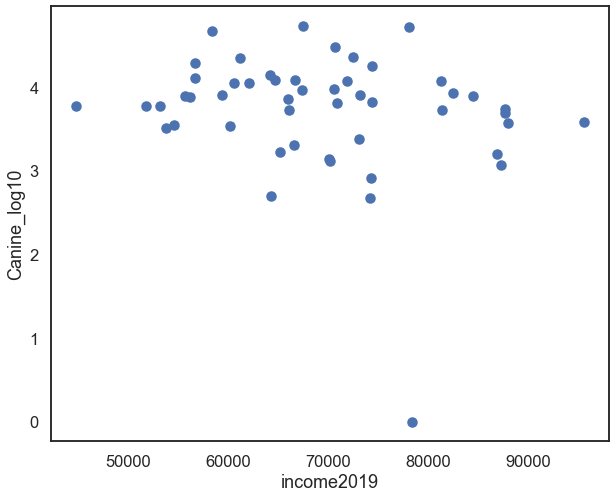

In [99]:
# look at the scatter plot again - feline
plt.scatter(income_pet['income2019'], income_pet['Canine_log10'])
plt.xlabel('income2019')
plt.ylabel('Canine_log10')

In [100]:
#to see the correlation between income and feline adoption:
x = np.float64(income_pet.income2019) #income array
x = sm.add_constant(x)
y1 = income_pet.Feline_log10 #feline log10 array

mod1=sm.OLS(y1,x)
res_1=mod1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           Feline_log10   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.2566
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.615
Time:                        10:56:15   Log-Likelihood:                -30.785
No. Observations:                  50   AIC:                             65.57
Df Residuals:                      48   BIC:                             69.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1256      0.404     10.215      0.0

In [101]:
#to see the correlation between income and canine adoption:
y2 = income_pet.Canine_log10 #canine log10 array

mod2=sm.OLS(y2,x)
res_2=mod2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Canine_log10   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.036
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.160
Time:                        10:56:15   Log-Likelihood:                -52.624
No. Observations:                  50   AIC:                             109.2
Df Residuals:                      48   BIC:                             113.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5993      0.625      7.357      0.0

### Income - Interpretation

In [102]:
res_1.params

const    4.13e+00
x1      -2.92e-06
dtype: float64

In [103]:
res_2.params

const    4.60e+00
x1      -1.27e-05
dtype: float64

From the above we can see that the linear regression of the feline adoption and income has an intercept of 4.125635, and the coefficient is -0.000003, indicating that there are no large relationship between feline adoption and income.
For the canine adoption, the linear regression has an intercept of 4.599306, and the coefficient is -0.000013, indicating that there are no large relationship between canine adoption and income.

In conclusion, there is no significant relationship between pet adoption and income across states in the US.

# Ethics & Privacy

Our project used different sets of data including feline and canine adoption rate by state, income per state, age structure by state, and race structure by state.  All the dataset were found on official websites and were published as public datasets. Meanwhile, we only used their data for this project and not for any commercial use. The focus of this project is to find the relationships between these datasets.The datasets we’ve collected are anonymous thus unable to reveal personal information. This ensured the personal privacy was not violated. However, due to the fact that we do not have access to the original survey, we are not able to identify if there were biases/discriminations within the original survey.  Meanwhile, as what would be shown in the limitation part below, there were some unsolvable errors within each dataset which was generated before or while the officials were concluding the surveys into datasets, and these errors might contribute to some bias when we were doing our own research.



# Conclusion & Discussion

### Conclusion of Interpretations and Analysis:
For age distribution we first visualized the total structure of different age groups in each state and surprisingly found out that the age structure was quite identical between each state. We further analyzed the relationship between age and feline and canine adoption by conducting OSL regression tests between age and feline adoption and canine adoption. As the p-value was all larger than 0.05, we concluded that both feline and canine adoption showed no statistically significant age structure. The second variable we analyzed was race structure. We took a similar process of visualization and OSL regression test. The visualization of race distribution was not as identical as age structure. Meanwhile, there is an outlier state—”Hawaii”, which has an extremely high proportion of Asian and Two or more races. This outlier might influence our final results of regression analysis. Thus, we removed those outliers and conducted our OSL regression. When running our OSL regression for race, there was an error of multicollinearity. We realized that this error might be generated due to the interdependence between different race groups, especially when we calculated the proportion of different ethnicities by summing all the rows within the dataset and dividing it by each cell. In order to get rid of this error, we removed the smallest ethnic groups, “Two or More Races” and "Hawaiian or Pacific Islander Alone':'Pacific", to run our regression model. The final results showed that the p-value was larger than 0.05, which also suggests that there is no significance between race distribution with feline or canine adoption. Finally, we visualized and analyzed income and feline/canine adoption. From the results of scatter plots and OSL regression, there is no significant relationship found between both feline and canine adoption and income across states in the US. In conclusion, there were no relationships between age structure with feline/canine adoption, race distribution with feline/canine adoption, and income with feline/canine adoption.

Although we did not find out patterns between canine/feline adoption and the chosen demographic factors, our research is still meaningful. The results of this project have the potential to help future studies identify factors that influence pet adoption rate. More studies about pet adoption and demography should be conducted in order to better regulate the whole pet market and increase the adoption rate. Public infrastructures and animal shelters can use these findings to make strategic pivots, helping more animals find their forever home.


### Limitation & weakness
Our team initially planned to base our study on data collected from 2019 to 2021, but we failed to find a suitable age dataset within this timeframe. Because our project analysis was based on data solely from 2019, our conclusion might not be representative of pet adoption rates in the long run. It is to be noted that our 2019 data is uninfluenced by the impact of COVID-19. Secondly, our analysis only included a limited number of datasets, leaving the possibility that there are additional factors influencing pet adoption rate that we failed to account for.
Accounting for limitations in our raw datasets, we made calculated choices to omit and modify our data, however, there were still unexpected issues that occurred.

In our pet adoption dataset, we had 0 values in certain rows. Because we couldn’t identify why these values were 0, we decided to include them as is into later analysis. In our age dataset, Alabama’s age structure summed up to a total of above 100%. Only Alabama had this issue, and since the overflowing amount wasn’t too substantial, we chose to move on with our analysis with this oddity in mind. In our race dataset, there was a column dedicated to a “Not Hispanic” racial group. After removing this column, we had to delete the original total population column and sum up the remaining racial groups to calculate a new total. This action led to a multicollinearity issue in our regression model that we resolved by deleting the “Two or More Races” and "Hawaiian or Pacific Islander Alone':'Pacific" groups. The state Hawaii was also omitted from our study because its racial structure proved to be an extreme outlier to the point of interfering with our analysis. Our team is fully aware that the decisions we made to maximize efficiency and increase convenience have the possibility of limiting the credibility of our final results.


# Team Contributions

- Anni Li: Data collection for income; data cleaning and EDA for income; wrote and modified group proposal, debug the project; wrote the final report for income & adoption part analysis

- Freya Li：Data Collection, Data Cleaning, EDA, mainly took charge of the pet adoption dataset.

- Tian Gao: searched data; wrote and modified group proposal, mainly resource and hypothesis parts; helped on beginning part of pet dataset import and cleaning; worked with Freya Li on final data merge and regression; final presentation video creation.

- Weining Dai: Cleaned the age dataset. Conducted the EDA of age and pet. Wrote and Found sources for “Background and Prior Work“. Wrote “Conclusion of Interpretations and Analysis” in the Conclusion.

- Yifei Yi: Data collection and cleaning on racial distribution per state. Conducted EDA on relationship between race and pet adoption. Wrote “Ethics & Privacy” and “Limitations & Weakness” in the Conclusion.
